# init

In [1]:
# demo: loads file with all messages (CSTARTTIME, CSENDERENDPOINTID, ymdhm )
# show some charts, anomaly detection with LSTM autoencoders

In [2]:
import base.dfBasics as dfBasics
import base.common as common
import base.encoder as encoder
import base.pfAdapt as pfAdapt
import base.charts as charts
#import base.anomaly as anomaly

import pandas as pd    
from pyspark.sql import functions

Setup Complete


In [3]:
sparkSession = dfBasics.getSparkSession()

### list directory

In [ ]:
from os import listdir

def listdirectory(path=None,filter='.'):
    return [x for x in listdir(path) if not x.startswith(filter)]    

_files = listdirectory(path='/tmp/enc')

In [ ]:
len(_files)
_files[0], senders[0]

## senders

In [ ]:
senders = sparkSession.read.parquet("/tmp/senders.parquet")
senders = list(senders.toPandas()['CSENDERENDPOINTID'])
#len(senders)

In [4]:
senders = list(sparkSession.read.parquet('hdfs://172.30.17.145:8020/tmp/data/senders.parquet').toPandas()['CSENDERENDPOINTID'])

In [ ]:
import pandas as pd
sf = pd.read_csv('/tmp/directory_sizes.txt', delimiter = "\t")
sf.columns =['size','file']
sf.drop(sf.tail(1).index,inplace=True) # drop last n rows

In [ ]:
sf = sf.sort_values(['size'])
sf.iloc[len(sf)-1].file
#sf

In [ ]:
sf

### load data

In [5]:
df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/tmp/data/enc/' + 'sla_enc_' + senders[0] + '.parquet')
pfall = df.toPandas()

In [ ]:
#pfall

In [ ]:
df = sparkSession.read.parquet('/tmp/' + sf.iloc[len(sf)-1].file)
pfall = df.toPandas()

In [ ]:
df = sparkSession.read.parquet('/tmp/enc/' + _files[1])
pfall = df.toPandas() 

In [ ]:
pfall

### work

In [ ]:
for file in _files:
    try:
        print(file)
        df = sparkSession.read.parquet('/tmp/enc/' + file)
        pfall = df.toPandas() 
    except Exception as exception:    
        pass

In [ ]:
pfall

In [ ]:
senders=senders[19:]
len(senders)

In [ ]:
1579760627614 - 1579760619146

In [ ]:

#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/CSENDERENDPOINTID/CSENDERENDPOINTID_9.parquet')
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_1580137124017.parquet')
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_1616754087742.parquet')
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/CSENDERENDPOINTID/CSENDERENDPOINTID_2191.parquet')
df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/CSENDERENDPOINTID_full/CSENDERENDPOINTID_9.parquet')
pfall = df.toPandas() 

In [ ]:
CSENDERENDPOINTID=9

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
SparkSession.builder.config('spark.local.dir', '/tmp').config("spark.executor.memory", "8g").config("spark.driver.memory", "8g").config("spark.driver.maxResultSize", "0").appName("jupyter").master("spark://clspromon-aio01.txx.seeburger.de:7077").getOrCreate()

In [ ]:
import numpy as np
import pandas as pd

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col

sparkSession = SparkSession.builder.config('spark.local.dir', '/tmp').config("spark.executor.memory", "8g").config("spark.driver.memory", "8g").config("spark.driver.maxResultSize", "0").appName("jupyter").master("spark://clspromon-aio01.txx.seeburger.de:7077").getOrCreate()

In [ ]:
sparkSession.getActiveSession()

## functions

In [6]:
## Setup charts
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

def get_ym_string(a,b) :
    return a + "-" + b
    #return a.join(["-",b]) 

def get_ym(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    return a,b

def get_ymd(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    return a,b,c

def make_2digits(blist):
    for n, b in enumerate(blist):
        if int(b) < 10:
             blist[n] = '0' + str(b)
    return blist

def get_ymd_string(a,b,c) :
    if isinstance(a, str) :
        return a + "-" + make_2digits([b])[0] + "-" + make_2digits([c])[0] 
    elif isinstance(a,pd.core.series.Series):
        return a.astype(str) + "-" + make_2digits(b.astype(str)) + "-" + make_2digits(c.astype(str))
    return a + "-" + pd.Index(make_2digits(b.tolist())) + "-" + pd.Index(make_2digits(c.tolist())) 

def get_ymdh(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    d = mdcountsall.index.get_level_values(3).astype(str)
    return a,b,c,d

def get_ymdhm(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    d = mdcountsall.index.get_level_values(3).astype(str)
    e = mdcountsall.index.get_level_values(4).astype(str)
    return a,b,c,d,e

def get_ymdh_string(a,b,c,d) :
    if isinstance(a, str) :
        return a + "-" + make_2digits([b])[0] + "-" + make_2digits([c])[0] + "-" + make_2digits([d])[0]
    elif isinstance(a,pd.core.series.Series):
        return a.astype(str) + "-" + make_2digits(b.astype(str)) + "-" + make_2digits(c.astype(str)) + "-" + make_2digits(d.astype(str))
    return a + "-" + pd.Index(make_2digits(b.tolist())) + "-" + pd.Index(make_2digits(c.tolist())) + "-" + pd.Index(make_2digits(d.tolist()))

def get_ymdhm_string(a,b,c,d,e) :
    if isinstance(a, str) :
        return a + "-" + make_2digits([b])[0] + "-" + make_2digits([c])[0] + "-" + make_2digits([d])[0] + "-" + make_2digits([e])[0]
    elif isinstance(a,pd.core.series.Series):
        return a.astype(str) + "-" + make_2digits(b.astype(str)) + "-" + make_2digits(c.astype(str)) + "-" + make_2digits(d.astype(str)) + "-" + make_2digits(e.astype(str))
    return a + "-" + pd.Index(make_2digits(b.tolist())) + "-" + pd.Index(make_2digits(c.tolist())) + "-" + pd.Index(make_2digits(d.tolist())) + "-" + pd.Index(make_2digits(e.tolist()))


def createData_ym(pfall,month) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['month'] == month)].groupby(['year','month'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month'])['year'].count()    
    a,b = get_ym(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ym_string(a,b)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData(pfall,month=-1,year=2020,outcome='outcome') :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour'])['year'].count()    
    a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2[outcome] =  mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int)

    #for pivot table
    data2['hours'] =  d.astype(int) 
    data2['days']  =  c.astype(int) 
    return data2


def createData_ymd(pfall,month,year=2020) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day'])['year'].count()    
    a,b,c = get_ymd(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymd_string(a,b,c)
    data2['year'] = a.astype(int) 
    data2['month'] = b.astype(int) 
    data2['day'] = c.astype(int) 
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData_ymdh(pfall,month,year=2020) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour'])['year'].count()    
    a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2['year'] = a.astype(int) 
    data2['month'] = b.astype(int) 
    data2['day'] = c.astype(int) 
    data2['hour'] = d.astype(int)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData_ymdhm(pfall,month,year=2020) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour','minute'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour','minute'])['year'].count()    
    a,b,c,d,e = get_ymdhm(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2['year'] = a.astype(int) 
    data2['month'] = b.astype(int) 
    data2['day'] = c.astype(int) 
    data2['hour'] = d.astype(int)
    data2['minute'] = e.astype(int)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2


def createData_column_ymdh(pfall,month=-1,year=2020, column=None) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)]
    else :
        mdcountsall = pfall 
    #a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(pfall['year'], pfall['month'], pfall['day'],pfall['hour'])
    df2 = mdcountsall[['year', 'month', 'day','hour',column]].copy()
    data2 = pd.concat([data2, df2], axis=1)
    data2.columns = list(data2.columns[:-1]) + ['outcome']
    
    return data2


def createData_column_ymd(pfall,month=-1,year=2020, column=None) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)]
    else :
        mdcountsall = pfall 
    #a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymd_string(pfall['year'], pfall['month'], pfall['day'])
    df2 = mdcountsall[['year', 'month', 'day',column]].copy()
    data2 = pd.concat([data2, df2], axis=1)
    data2.columns = list(data2.columns[:-1]) + ['outcome']
    
    return data2


def label(graph,skip,rot) :
    for ind, label in enumerate(graph.get_xticklabels()):
        if ind % skip == 0:  # every 10th label is kept
            label.set_visible(True)
            label.set_rotation(rot)
        else:
            label.set_visible(False)

def createBarplot(md=None,fx=24,fy=12,fontscale=3.0,title="") :
    sns.set(style='whitegrid', palette='muted', font_scale=fontscale)
    plt.figure(figsize=(fx,fy))
    plt.title(title)
    ax = sns.barplot(x=md['date'], y=md['outcome'], data=md)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
    plt.tight_layout()
    plt.show()
    return ax

## heatmap
def createHeatmap(piv,title="") :
    plt.figure(figsize=(24,8))
    plt.title(title)
    ax = sns.heatmap(piv, square=True)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
    plt.tight_layout()
    plt.show()
    return ax

Setup Complete


In [7]:
#pfall
#pfall5 = createData_column_ymdh(pfall,column='CMESSAGETAT2')
#get_ymdh_string(pfall5['year'], pfall5['month'], pfall5['day'],pfall5['hour'])
#pfall5['year']
#pfall5['year'].astype(str) + '_' + make_2digits(pfall5['month'].astype(str))
#make_2digits([c])[0] 

#pfall5.columns = pfall5.columns[:-1] + 'outcome'
#pfall5.columns = list(pfall5.columns[:-1]) + ['outcome']
#pfall5

In [8]:
#year=2022
#month=7
#mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()

In [9]:
#pfall

In [10]:
#checka(pfall[(pfall[year]== 2022) & (pfall[month]== 7)])
#pfall[(pfall[year]== '2022') & (pfall[month]== '7')]
#pfall[(pfall[year] == 2022)] 
#pfall
#pfall5 = createData_column_ymdh(pfall,column='CMESSAGETAT2')
#pfall6 = checka(pfall5)
#pd.unique(pfall5['year'])

### check

In [11]:
from calendar import monthrange

def get_month(pda, year=2020, month=1):
    return pda[(pda['month'] == month) & (pda['year'] == year)]

def is_complete(pda, year=2020, month=1):
    mm = pda[(pda['month'] == month) & (pda['year'] == year)]
    if len(mm) > 0:
        return monthrange(year, month)[1] == len(mm)
    return None
    
def check_complete(pda, year=2020):
    for m in range(1, 13):
        mm = pda[(pda['month'] == m) & (pda['year'] == year)]
        if len(mm) > 0:
            print(m,monthrange(year, m)[1] == len(mm))

            
def add_line_to_dataframe(df=None,year=None,month=None,day=None,hour=None,minute=None,value=0): 
    
    if hour is not None:
        if minute is not None:
            _date = get_ymdhm_string(str(year),str(month),str(day),str(hour),str(minute)) 
            df.loc[len(df)]=[_date,year,month,day,hour,minute,value]  
        else:    
            _date = get_ymdh_string(str(year),str(month),str(day),str(hour)) 
            df.loc[len(df)]=[_date,year,month,day,hour,value]   
    else:    
        _date = get_ymd_string(str(year),str(month),str(day))
        df.loc[len(df)]=[_date,year,month,day,value]     
    
def check_and_fill_hours_of_day(df=None,year=2022,month=7,day=None):
    _df=df[(df['year']==year) & (df['month']==month) & (df['day']==day)] 
    #print(_df)
    
    minutes = False
    if 'minute' in df.columns:
        minutes = True
    
    for hour in range(0, 24):
        if len(_df[_df['hour']==hour]) == 0:
            if minutes == True:
                for minute in range(0, 59):
                    #_date = get_ymdhm_string(str(year),str(month),str(day),str(hour),str(minute))  
                    add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour,minute=minute) 
            else:
                #_date = get_ymdh_string(str(year),str(month),str(day),str(hour))  
                add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour) 
        else:
            if minutes == True:
                _df2 = _df[_df['hour']==hour]
                for minute in range(0, 59):
                    if len(_df2[_df2['minute']==minute]) == 0:
                        add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour,minute=minute)
            else:
                pass
    #print (df)        
    return df     
    
    
#pda :  date,year,month,day.outcome 
def fill(pda,year,month,min_day=1,max_day=-1,hours=False): 
    if max_day == -1:
        days = monthrange(year, month)[1]
    else:
        days = max_day
        
    #print(min_day,days,max_day,hours)     
    minutes = False
    if 'minute' in pda.columns:
        minutes = True
        
    df = pda[(pda['month'] == month) & (pda['year'] == year)]
    for day in range(min_day, days + 1):
        if len(df[df['day']==day]) == 0:
            #print(day)
            if hours == True:
                for hour in range (0,24):
                    if minutes == True:
                        for minute in range(0, 59): 
                            add_line_to_dataframe(df=pda,year=year,month=month,day=day,hour=hour,minute=minute) 
                    else:
                        add_line_to_dataframe(df=pda,year=year,month=month,day=day,hour=hour) 
            else:    
                add_line_to_dataframe(df=pda,year=year,month=month,day=day)
        else:
            if hours == True:
                #print(year,month,day)
                check_and_fill_hours_of_day(df=pda,year=year,month=month,day=day)
       
    
def check(pda):
    _start_year = min(pd.unique(pda['year']))
    _end_year = max(pd.unique(pda['year']))  
    _start_month = min(pd.unique(pda[pda['year']== _start_year]['month']))
    _end_month = max(pd.unique(pda[pda['year']== _end_year]['month']))
    _end = 13
    
    if 'hour' in pda.columns:
        hours = True
    else:
        hours = False
        
    for year in range(_start_year,_end_year+1):   
        for month in range(_start_month,_end):        
            #print(year,month, _end_month, _end_year)
            
            if((month == _start_month) & (year == _start_year)):
                min_day = (min(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                min_day = 1
                
            if((month == _end_month) & (year == _end_year)):
                max_day = (max(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
                #print(month,year,max_day)
                fill(pda,year,month,min_day=min_day, max_day=max_day,hours=hours)
            else:    
                fill(pda,year,month,min_day=min_day,hours=hours)
            if (year == _end_year) &  (month == _end_month):
                #print('DONE')
                break    
        _start_month=1
            
        if year == (_end_year-1):
            _end = _end_month + 1     
            
        if (year == _end_year) &  (month == _end_month):
            #print('DONE')
            break       
            

### checka

In [12]:
# 2019-10-29-00
# 2022-10-06-23

def mean_column(column):
    return int(round(column.mean(),0))

def check_and_fill_hours_of_daya(df=None,year=2022,month=7,day=None, outcome='outcome'):
    _df=df[(df['year']==year) & (df['month']==month) & (df['day']==day)] 
    
    df=pd.DataFrame(columns=['date', 'year', 'month', 'day', 'hour', outcome])
    for hour in range(0, 24):
        _hours = _df[_df['hour']==hour]
        if len(_df[_df['hour']==hour]) == 0:
            _date = get_ymdh_string(str(year),str(month),str(day),str(hour))  
            add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour) 
            pass
        else:
            add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour,value=mean_column(_hours[outcome]))
    #print (df)      
    return df 

#pda :  date,year,month,day.outcome 
def filla(pda,year,month,min_day=1,max_day=-1,hours=False, outcome='outcome'): 
    if max_day == -1:
        days = monthrange(year, month)[1]
    else:
        days = max_day
        
    #df = pda[(pda['month'] == month) & (pda['year'] == year)]
    if hours == True:
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', 'hour', outcome])
    else:
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', outcome])
        
    for day in range(min_day, days + 1):
        if hours == True:
            df_b = check_and_fill_hours_of_daya(df=pda,year=year,month=month,day=day,outcome=outcome)
            df = pd.concat([df, df_b], ignore_index=True)   
        else:
            _df=pda[(pda['year']==year) & (pda['month']==month) & (pda['day']==day)]
            if len(_df) > 0 :
                #print(len(_df),mean_column(_df['outcome']), list(_df['outcome']))
                value=mean_column(_df[outcome])
            else:
                value=0
            add_line_to_dataframe(df=df,year=year,month=month,day=day,value=value) 
    return df   
            
    
def checka(pda, outcome='outcome'):
    _start_year = min(pd.unique(pda['year']))
    _end_year = max(pd.unique(pda['year']))  
    _start_month = min(pd.unique(pda[pda['year']== _start_year]['month']))
    _end_month = max(pd.unique(pda[pda['year']== _end_year]['month']))
    _end = 13
    
    if 'hour' in pda.columns:
        hours = True
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', 'hour', outcome])
    else:
        hours = False
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', outcome])
    
    
    for year in range(_start_year,_end_year+1):   
        for month in range(_start_month,_end):        
            #print(year,month, _end_month, _end_year)
            
            if((month == _start_month) & (year == _start_year)):
                min_day = (min(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                min_day = 1
                
            if((month == _end_month) & (year == _end_year)):
                max_day = (max(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
                #print(month,year,max_day)
                df_b = filla(pda,year,month,min_day=min_day, max_day=max_day,hours=hours,outcome=outcome)
                df = pd.concat([df, df_b], ignore_index=True)
            else:    
                df_b =  filla(pda,year,month,min_day=min_day,hours=hours,outcome=outcome)
                df = pd.concat([df, df_b], ignore_index=True)
            if (year == _end_year) &  (month == _end_month):
                #print('DONE')
                break    
        _start_month=1
            
        if year == (_end_year-1):
            _end = _end_month + 1     
            
        if (year == _end_year) &  (month == _end_month):
            #print('DONE')
            break       
    return df        
           

In [13]:
def get_date_list(pda, hours=False):
    _start_year = min(pd.unique(pda['year']))
    _end_year = max(pd.unique(pda['year']))  
    _start_month = min(pd.unique(pda[pda['year']== _start_year]['month']))
    _end_month = max(pd.unique(pda[pda['year']== _end_year]['month']))
    _end = 13
    
    _date_list = []
    
    for year in range(_start_year,_end_year+1):   
        for month in range(_start_month,_end):        
            #print(year,month, _end_month, _end_year)
            
            if((month == _start_month) & (year == _start_year)):
                min_day = (min(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                min_day = 1
            
            if((month == _end_month) & (year == _end_year)):
                days = (max(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                days = monthrange(year, month)[1]
            
            for day in range(min_day, days + 1):
                if hours == True:
                    for hour in range(0, 24):
                        _date = get_ymdh_string(str(year),str(month),str(day),str(hour)) 
                        _date_list.append(_date) 
                else:
                    _date = get_ymd_string(str(year),str(month),str(day))
                    _date_list.append(_date)    
            
            if (year == _end_year) &  (month == _end_month):
                #print('DONE')
                break    
        _start_month=1
            
        if year == (_end_year-1):
            _end = _end_month + 1     
            
        if (year == _end_year) &  (month == _end_month):
            #print('DONE')
            break       
    return _date_list        
           

In [14]:
def check_and_fill_hours_of_month(dataframe=None,year=2022,month=7):
    
    days=pd.unique(dataframe['days'])
    _start_day = min(days)
    _end_day   = max(days)  

    for day in range(_start_day,_end_day+1):
        _df=dataframe[dataframe['days']==day] 
        for hour in range(0, 24):
            if len(_df[_df['hours']==hour]) == 0:
                _date = get_ymdh_string(str(year),str(month),str(day),str(hour))  
                #print([_date,0,hour,day])
                dataframe.loc[len(dataframe)]=[_date,0,hour,day]
    return dataframe       

In [15]:
def check_complete(dataframe=None,year=2020):
    for m in range(1, 13):
        #print(m)
        mm = dataframe[(dataframe['month'] == m) & (dataframe['year'] == year)]
        print(m,monthrange(year, m)[1] == len(mm))

def fill1(pda,year,month):        
    days = monthrange(year, month)[1]
    df = pda[(pda['month'] == month) & (pda['year'] == year)]
    for day in range(1, days + 1):
        if len(df[df['day']==day]) == 0:
            pda.loc[len(pda)]=[get_ymd_string(str(year),str(month),str(day)),year,month,day,0]
    

In [16]:
def unique(pfall):
    return pd.unique(pfall['CRECEIVERENDPOINTID']), pd.unique(pfall['CSTATUS']), pd.unique(pfall['CSERVICE']), pd.unique(pfall['CSENDERPROTOCOL']), pd.unique(pfall['CRECEIVERPROTOCOL'])

#un=unique(pfall)
#unique(pfall[pfall['CRECEIVERENDPOINTID']==725])

#pfall0 = pfall[pfall['CRECEIVERENDPOINTID']==un[0][1]]
#pda = createData_ymd(pfall0,0)

#del pda['index'] 

In [17]:
class Time(object):         
    def __init__(self,year=None,month=None,day=None):
        self.year  = self._int_value(year)
        self.month = self._int_value(month)
        self.day   = self._int_value(day)
    
    def _int_value(self,value):
        if value == '' or value == None:
            return None
        return int(value)
        

class TimeRange(object):    
    def __init__(self,dataframe=None,year_from=None,month_from=None,day_from=None,year_to=None,month_to=None,day_to=None):
        if dataframe is None:
            self.start = Time(year=year_from,month=month_from,day=day_from).__dict__
            self.end   = Time(year_to,month_to,day_to).__dict__
        else:
            #print(dataframe)
            year_from = min(pd.unique(dataframe['year']))
            year_to = max(pd.unique(dataframe['year']))  
            month_from = min(pd.unique(dataframe[dataframe['year']== year_from]['month']))
            month_to = max(pd.unique(dataframe[dataframe['year']== year_to]['month']))
            day_from = min(pd.unique(dataframe[(dataframe['year']== year_from) & (dataframe['month'] == month_from)]['day']))
            day_to = max(pd.unique(dataframe[(dataframe['year']== year_to) & (dataframe['month'] == month_to)]['day']))
            self.start = Time(year_from,month_from,day_from).__dict__
            self.end   = Time(year_to,month_to,day_to).__dict__
            
#TimeRange(dataframe=pfall).__dict__  

def set_date_widget_value(element, value):
    if value != None:
        element.value = str(value)
    else:
        element.value = ''

def init_date_widget(_res):
    _range = TimeRange(dataframe=_res)
    set_date_widget_value(year_from, _range.start['year'])
    set_date_widget_value(month_from, _range.start['month'])
    set_date_widget_value(day_from, _range.start['day'])
    
    set_date_widget_value(year_to, _range.end['year'])
    set_date_widget_value(month_to, _range.end['month'])
    set_date_widget_value(day_to, _range.end['day'])

In [18]:
def createHeatmapPfall(pfall=None,sender='all',month=1,year=2020,values='outcome',index='hours',columns='days'):
    #print(month,year)
    global data2
    global piv
    data2 = createData(pfall,month,year=year)
    piv = pd.pivot_table(data2, values=values,index=[index], columns=[columns], fill_value=0)
    #titlestring = "CSENDERENDPOINTID: " + str(topsender.iloc[7]['CSENDERENDPOINTID']) + ": "+ category + " so far = " + str(topsender.iloc[7]['outcome']) + " , month: " + str(month) 
    #titlestring = "CSENDERENDPOINTID: " + str(topsender.iloc[7]['CSENDERENDPOINTID']) + ": "+ category  + " month: " + str(month) 
    titlestring ="number messages " + str(year) + "-" + str(month) + "  " + sender
    sns.set(style='whitegrid', palette='muted', font_scale=1.2)
    createHeatmap(piv, titlestring)

In [19]:
def on_value_submit_month(change):
    #adapt_all()    
    sender=0
   
    with out:
        clear_output()
        month=int(month_from.value)
        year=int(year_from.value)
        createHeatmapPfall(pfall0,"endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID),month=month, year=year)
        #print(int(month_from.value), year_from.value)
        #createHeatmapPfall(pfall=pfall,sender='all',month=1,year=2020)
        
        md2 = createData_ymd(pfall0,month,year=year)
        ax=createBarplot(md2,fx=24,fy=12,fontscale=3.0,title="number messages " + "endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID))
        label(ax,1000,90)

## work

In [ ]:
make_2digits([4])

pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
del pfall1['index']
del pfall1['CGLOBALMESSAGEID']

pfall0 = pfall
pda = createData_ymdh(pfall0,0)

check(pda)
pfall1 = pda

In [ ]:
pfall.columns


In [ ]:
pd.unique(pfall['CRECEIVERENDPOINTID'])

In [ ]:
#A

In [ ]:
CRECEIVERENDPOINTID=725

In [ ]:
pfall0 = pfall[pfall['CRECEIVERENDPOINTID']==725]
pda = createData_ymd(pfall0,0)

In [ ]:
# B
pfall0 = pfall
pda = createData_ymd(pfall0,0)

In [ ]:
pda = pda.sort_values(['date']).reset_index()   

In [ ]:
del pda['index'] 

In [ ]:
pda

In [ ]:
#check_complete(dataframe=pda, year=2022)
check(pda)
#pda
get_month(pda, year=2022, month=10)

In [ ]:
#A
fill(pda,2019,11)     
fill(pda,2019,12) 
fill(pda,2020,1)
fill(pda,2020,2)
fill(pda,2020,3)
fill(pda,2020,4)
fill(pda,2020,5)
fill(pda,2020,6)
fill(pda,2020,7)
fill(pda,2020,8)
fill(pda,2020,9)
fill(pda,2020,10)
fill(pda,2020,11)
fill(pda,2020,12)
fill(pda,2021,1)
fill(pda,2021,2)
fill(pda,2021,3)
pda = pda.sort_values(['date']).reset_index()

In [ ]:
pfall1 = pda

## create data

In [68]:
make_2digits([4])

pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
del pfall1['index']
del pfall1['CGLOBALMESSAGEID']

pfall0 = pfall
pda = createData_ymd(pfall0,0)

check(pda)
pda_day = pda.sort_values(['date']).reset_index()
#pfall1 = pda

In [21]:
pda_hour = createData_ymdh(pfall0,0)
check(pda_hour)
pda_hour = pda_hour.sort_values(['date']).reset_index()

In [103]:
replace_index_by_date_column(pda_hour)
replace_index_by_date_column(pda_day)

In [223]:
_pfall = pfall0
_pfall = _pfall[(_pfall['year']==2022) & (_pfall['month']==7) & (_pfall['day']==1)  & (_pfall['hour']==12)   ].sort_values(['minute']).reset_index()

In [225]:
pd.unique(pfall0['minute'])

array([27,  6, 51, 25,  2, 19, 17, 26, 22, 39, 40, 31, 48, 42, 20, 11, 57,
       21, 16, 34, 55, 35, 44, 50, 30,  7, 53, 36, 32,  0,  1,  9, 37, 12,
        4, 56, 29, 46, 47,  3, 24, 33, 23, 45, 13, 43, 59, 18, 10, 52, 38,
       54, 58, 49, 15, 41,  5,  8, 28, 14], dtype=int32)

In [224]:
_pfall

,index,CGLOBALMESSAGEID,CSTARTTIME,CENDTIME,CSTATUS,CSERVICE,CSENDERENDPOINTID,CSENDERPROTOCOL,CINBOUNDSIZE,CRECEIVERPROTOCOL,CRECEIVERENDPOINTID,CSLATAT,CMESSAGETAT2,CSLADELIVERYTIME,year,month,day,hour,minute
0,12664,0f88c311-f925-11ec-bf3d-7778ac1e100d,1656669811136,1656669815927,14,6,2261,4,19244,0,2018,4776,4791,1656669815912,2022,7,1,12,3
1,32743,332e47e3-f925-11ec-84c3-49e4ac1e100f,1656669870942,1656669876827,14,6,2261,4,19226,0,2018,5853,5885,1656669876795,2022,7,1,12,4
2,40960,d0191163-f926-11ec-bf3d-7778ac1e100d,1656670563702,1656670569562,14,6,2261,4,19215,0,1227,5828,5860,1656670569530,2022,7,1,12,16
3,16688,d003b4a7-f926-11ec-bf3d-7778ac1e100d,1656670563562,1656670569340,14,6,2261,4,19247,0,1227,5715,5778,1656670569277,2022,7,1,12,16
4,16475,cff0a1d7-f926-11ec-bf3d-7778ac1e100d,1656670563437,1656670570606,14,6,2261,4,19239,0,1227,7075,7169,1656670570512,2022,7,1,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,21871,d7c6e963-f92b-11ec-bf3d-7778ac1e100d,1656672724069,1656672731161,14,6,2261,4,19237,0,1227,7046,7092,1656672731115,2022,7,1,12,52
58,1196,e8764df3-f92b-11ec-bf3d-7778ac1e100d,1656672752062,1656672756964,14,6,2261,4,19238,0,1227,4849,4902,1656672756911,2022,7,1,12,52
59,21457,d9247d9b-f92b-11ec-bf3d-7778ac1e100d,1656672726360,1656672731936,14,6,2261,4,19240,0,1227,5529,5576,1656672731889,2022,7,1,12,52
60,28634,ea13d152-f92b-11ec-bf3d-7778ac1e100d,1656672754772,1656672760430,14,6,2261,4,19234,0,1227,5595,5658,1656672760367,2022,7,1,12,52


In [214]:
#get_date_list(pfall0,hours=True)

In [ ]:
#pda_minute = createData_ymdhm(pfall0,0)

In [ ]:
#check(pda_minute)
#pda_minute = pda_minute.sort_values(['date']).reset_index()

In [ ]:
#_column = 'CINBOUNDSIZE'
_column='CMESSAGETAT2'
pfall5 = createData_column_ymd(pfall,column=_column)
pda_CMESSAGETAT2_day = checka(pfall5 ).sort_values(['date'])

In [ ]:
#_column = 'CINBOUNDSIZE'
_column='CMESSAGETAT2'
pfall5 = createData_column_ymdh(pfall,column=_column)
pda_CMESSAGETAT2_hour = checka(pfall5 ).sort_values(['date'])
#pda_CINBOUNDSIZE_hour = checka(pfall5 ).sort_values(['date'])

### EKG

In [ ]:
#https://www.renom.jp/notebooks/tutorial/time_series/lstm-anomalydetection/notebook.html
!ls /home/jovyan/work/cls/jupyter/qtdbsel102.txt
!ls /tmp

In [ ]:
spx_df =  pd.read_csv('/home/jovyan/work/cls/jupyter/spx.csv', parse_dates=['date'], index_col='date')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

In [ ]:
ecg_df = pd.read_csv('/home/jovyan/work/cls/jupyter/qtdbsel102.txt', header=None, delimiter='\t')

In [ ]:
df = pd.read_csv('/home/jovyan/work/cls/jupyter/qtdbsel102.txt', header=None, delimiter='\t')
ecg = df.iloc[:,2].values
ecg = ecg.reshape(len(ecg), -1)
print('length of ECG data : ', len(ecg))

# standardize
scaler = StandardScaler()
std_ecg = scaler.fit_transform(ecg)

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(np.arange(5000), std_ecg[:5000], color='b')
plt.ylim(-3, 3)
x = np.arange(4200,4400)
y1 = [-3]*len(x)
y2 = [3]*len(x)
plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
plt.show()


In [ ]:
normal_cycle = ecg[5000:]
test = ecg[:5000]

In [ ]:
df

### null values

In [ ]:
def null_value_percent_column(df,column='outcome'):
    return len(df[df[column] == 0]) / len(df)
    
print(null_value_percent_column(pda_day))
print(null_value_percent_column(pda_hour))

In [ ]:
dnull = pda_hour[(pda_hour['year'] == 2022)&(pda_hour['month'] == 7)]
_null_column= dnull['outcome'] == 0

In [ ]:
dnull['null'] = _null_column.astype(int)

In [ ]:
dnull[dnull['null'] == 1]




In [ ]:
def createHeatmap2(data2,sender='all',month=1,year=2020,values='outcome',index='hours',columns='days'):
    piv = pd.pivot_table(data2, values=values,index=[index], columns=[columns], fill_value=0)
    titlestring ="number messages " + str(year) + "-" + str(month) + "  " + sender
    sns.set(style='whitegrid', palette='muted', font_scale=1.2)
    createHeatmap(piv, titlestring)

createHeatmap2(dnull,sender='all',month=7,year=2022,values ='null',index='hour',columns='day')

### work

In [ ]:
from datetime import time
import datetime as dt
import calendar
import pytz
de = pytz.timezone('Europe/Berlin')

# long timestamp
def date(x):
    return  dt.datetime.fromtimestamp(float(x) / 1e3, tz=de)


def adddatecolumns(data,pf,column) :
    data['year'] = pf[column].apply(lambda x: date(x).date().year)
    data['month'] = pf[column].apply(lambda x: date(x).date().month)
    data['day'] = pf[column].apply(lambda x: date(x).date().day)
    data['hour'] = pf[column].apply(lambda x: date(x).time().hour)
    data['minute'] = pf[column].apply(lambda x: date(x).time().minute)
    #data['second'] = pf[column].apply(lambda x: x.time().second)
    #data['microsecond'] = pf[column].apply(lambda x: x.time().microsecond)

def converttimestampcolumnn(pf,tsc) :
    pf[tsc] = pf[tsc].apply(lambda x: dt.datetime.fromtimestamp(float(x) / 1e3))

In [ ]:
pfall0['minute'] = pfall0['CSTARTTIME'].apply(lambda x: date(x).time().minute)

In [ ]:
pfall0

In [ ]:
_df=pd.DataFrame(columns=['file_name', 'day', 'hour'])
_df.loc[len(_df)]=['name',null_value_percent_column(pda_day),null_value_percent_column(pda_hour)] 
_df.loc[len(_df)]=['name',null_value_percent_column(pda_day),null_value_percent_column(pda_hour)] 
_df.to_parquet('/tmp/null_values.parquet')

In [ ]:
import pandas as pd
null_percent = pd.read_parquet('/tmp/null_values.parquet')
null_percent_day.columns = ['file', 'day', 'hour']

In [ ]:
null_percent_day = null_percent.sort_values(['day'])

In [ ]:
_file = null_percent_day.iloc[0]['file']
#df = sparkSession.read.parquet('/tmp/enc/' + _file)

_file1 = null_percent_day.iloc[1]['file']
#df = sparkSession.read.parquet('/tmp/enc/' + _file , '/tmp/enc/' + _file1)
df = sparkSession.read.parquet(*flist)

pfall9 = df.toPandas() 

len(pfall9)

In [ ]:
pfall = pfall9

In [ ]:
listi = list(null_percent_day['file'])
flist = ",".join('/tmp/enc/' + s for s in listi).split(',')



In [ ]:
len(pfall9)
pfall9
flist = ['/tmp/enc/' + _file , '/tmp/enc/' + _file1]
type (flist)

In [ ]:
_df=pd.DataFrame(columns=['file', 'day', 'hour'])
for file in _files:
    try:
        #print(file)
        df = sparkSession.read.parquet('/tmp/enc/' + file)
        pfall = df.toPandas() 
        
        make_2digits([4])

        pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
        del pfall1['index']
        del pfall1['CGLOBALMESSAGEID']

        pfall0 = pfall
        pda = createData_ymd(pfall0,0)

        check(pda)
        pda_day = pda.sort_values(['date']).reset_index()
        
        pda_hour = createData_ymdh(pfall0,0)
        check(pda_hour)
        pda_hour = pda_hour.sort_values(['date']).reset_index()
        
        _df.loc[len(_df)]=[file,null_value_percent_column(pda_day),null_value_percent_column(pda_hour)] 
        _df.to_parquet('/tmp/null_values.parquet')
    except Exception as exception:    
        pass

In [ ]:
pfall[pfall['year'] == 2022]

In [ ]:
pda_CMESSAGETAT2_hour

In [ ]:
pfall1

In [ ]:

   
#pda.reset_index()
#del(pda['index'])
#pfall2 = pda[(pda['year']==2019) & (pda['month']==10)].sort_values(['date']).reset_index()
pfall2 = pda[(pda['year']==2021)].sort_values(['date']).reset_index()
del pfall2['index']
#del pfall2['level_0']
pfall2

In [ ]:
check(pfall2)
pfall2.sort_values(['date']).reset_index()


In [ ]:
#pfall2.sort_values(['date']).reset_index()
pfall2[(pfall2['year']==2019) & (pfall2['month']==10)].sort_values(['date']).reset_index()

#check(pfall2)

In [ ]:
#del pfall2['index']
#check(pfall2)
pfall2 = pfall2[(pfall2['year']==2019)].sort_values(['date']).reset_index()
pfall2


## visualization

In [ ]:
pda
md = createData_ym(pfall1,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by all endpoints")

In [ ]:
#md
# 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) 
#del pfall1['index']
pfall1

In [ ]:
md2 = createData_ymdh(pfall1,7,year=2022)
ax=createBarplot(md2,fx=24,fy=12,fontscale=3.0,title="number messages sent by all endpoints")
label(ax,1000,90)

### Graph

In [ ]:
md3=createData(pda_CMESSAGETAT2_hour,7,year=2022)
#md3=md3[(md3['days'] == 11) | (md3['days'] == 12) | (md3['days'] == 13)].reset_index()
#del(md3['index'])
_df =  check_and_fill_hours_of_month(dataframe=md3,year=2022,month=7).sort_values(['date']).reset_index()     

fig = plt.figure(figsize=(18,9))
plt.plot(_df.index, _df.outcome, label='msg count');

In [ ]:
_df = pda_CMESSAGETAT2_hour
_df = _df[(_df['year'] == 2022) & (_df['month'] == 7) ].reset_index()  
#_df = _df[(_df['year'] == 2022) & (_df['month'] == 7) & (_df['day'] == 12)].reset_index() 

fig = plt.figure(figsize=(18,9))
plt.plot(_df.index, _df.outcome, label='msg count');

In [ ]:
_df

In [ ]:
 

pfall2 = pfall1[(pfall1['year'] == 2022) & (pfall1['month'] == 7)  & (pfall1['day'].isin([10,11,12,13]))].sort_values(['date'] )
del(pfall2['index'])
check(pfall2)
pfall2=pfall2.sort_values(['date'] ).reset_index()
del(pfall2['index'])

In [ ]:

fig = plt.figure(figsize=(18,9))
plt.plot(pfall2.index, pfall2.outcome, label='msg count');
#plt.plot(pfall2.date, pfall2.outcome, label='msg count');

In [ ]:
md3

In [ ]:
md3

In [ ]:
# pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
md2['outcome'].sum()    

In [ ]:
createHeatmapPfall(pfall=pfall,sender='all',month=7,year=2022)

### hbox init

In [ ]:
layout2 = {'width': '400px'}

year_from   = widgets.Text(description = 'year',value = '2020', style=style, layout=layout2,disabled=False)   
year_to     = widgets.Text(description = 'to',value = '', style={'description_width': '20px'}, layout={'width': '200px'},disabled=False)  
#year_hbox = widgets.HBox([year_from,year_to])
year_hbox = widgets.HBox([year_from])

#month  = widgets.Text(description = 'month',value = '', style=style, layout=layout,disabled=False) 
month_from   = widgets.Text(description = 'month',value = '1', style=style, layout=layout2,disabled=False)   
month_to     = widgets.Text(description = 'to',value = '', style={'description_width': '20px'}, layout={'width': '200px'},disabled=False)  
#month_hbox   = widgets.HBox([month_from,month_to])
month_hbox   = widgets.HBox([month_from])

day_from   = widgets.Text(description = 'day',value = '', style=style, layout=layout2,disabled=False)   
day_to     = widgets.Text(description = 'to',value = '', style={'description_width': '20px'}, layout={'width': '200px'},disabled=False)  
day_hbox   = widgets.HBox([day_from,day_to])

month_from.on_submit(on_value_submit_month)
year_from.on_submit(on_value_submit_month)

out = widgets.Output()

display (year_hbox,month_hbox,out)
#init_date_widget(pfall)  

In [ ]:
#data2
#TimeRange(dataframe=pfall).__dict__
_pf = pfall.drop_duplicates(subset=['month','day','year'])
#_pf[(_pf['month'] == 1) & (_pf['year'] == 2020)]
_pf = pfall[['month','day','year']].drop_duplicates()

_days = len(_pf[(_pf['month'] == 10) & (_pf['year'] == 2019)]) \
+ len(_pf[(_pf['month'] == 11) & (_pf['year'] == 2019)]) \
+ len(_pf[(_pf['month'] == 12) & (_pf['year'] == 2019)]) \
+ len(_pf[(_pf['month'] == 1) & (_pf['year'] == 2020)]) \
+ len(_pf[(_pf['month'] == 2) & (_pf['year'] == 2020)]) \
+ 18 , len(_pf)
_days[0] / _days[1]

In [ ]:
TimeRange(dataframe=pfall).__dict__

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# new

In [ ]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [ ]:
pfall1= pfall6

In [256]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
!pip install ipynb

ERROR: Could not find a version that satisfies the requirement ipynb (from versions: none)
ERROR: No matching distribution found for ipynb


/home/jovyan/work/art_daily_small_noise.csv
Number of training samples: 4032
Training input shape:  (3745, 288, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout_8 (Dropout)         (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_9 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv

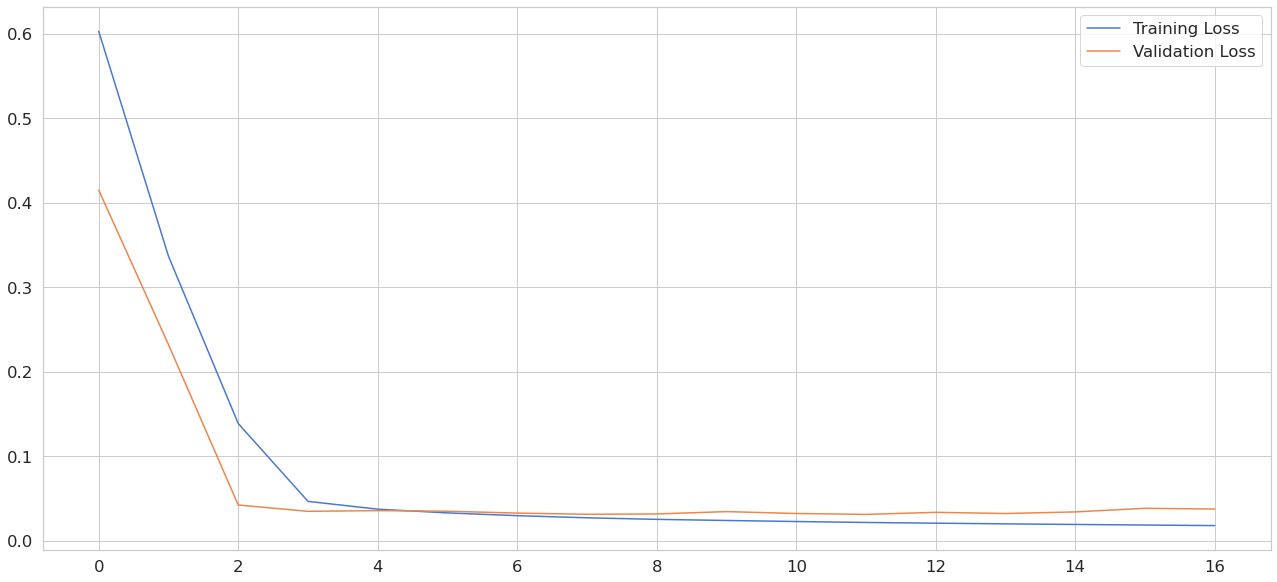

118/118 [==============================] - 1s 4ms/step


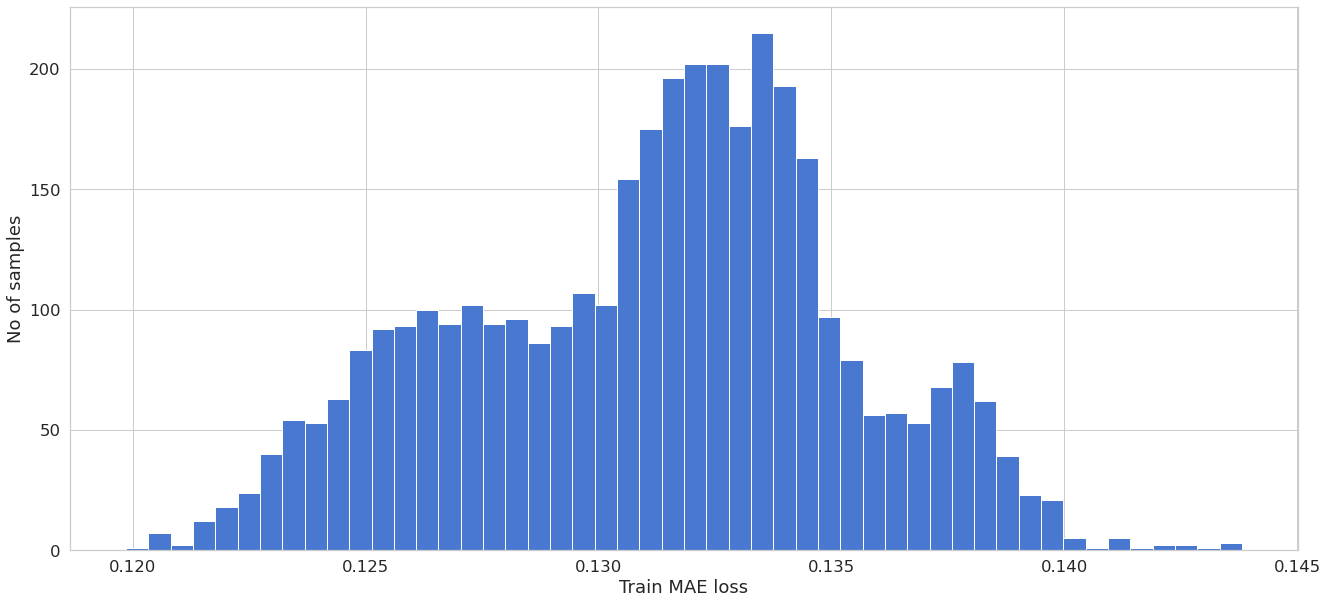

Reconstruction error threshold:  0.1438123509477969


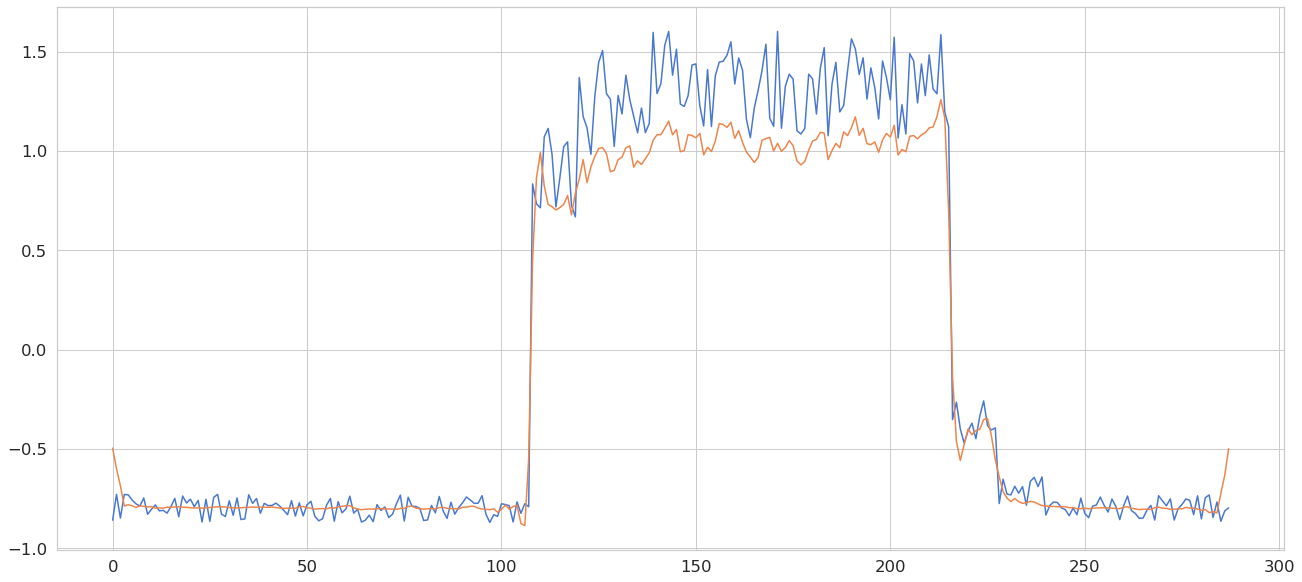

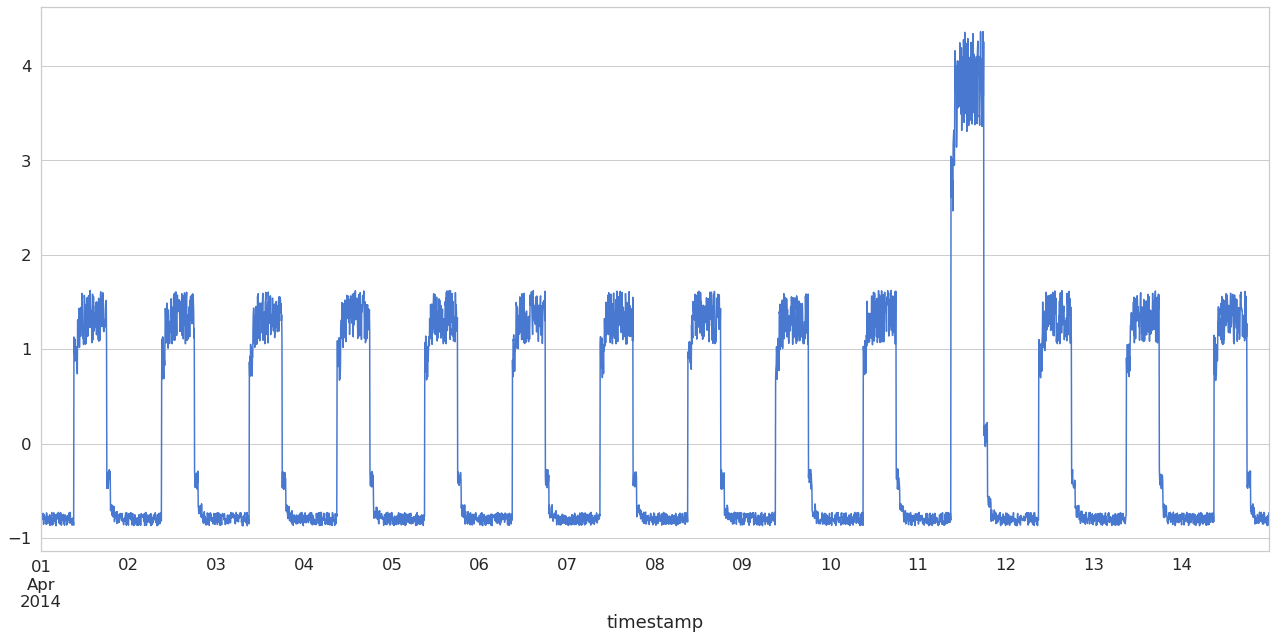

Test input shape:  (3745, 288, 1)
118/118 [==============================] - 0s 4ms/step


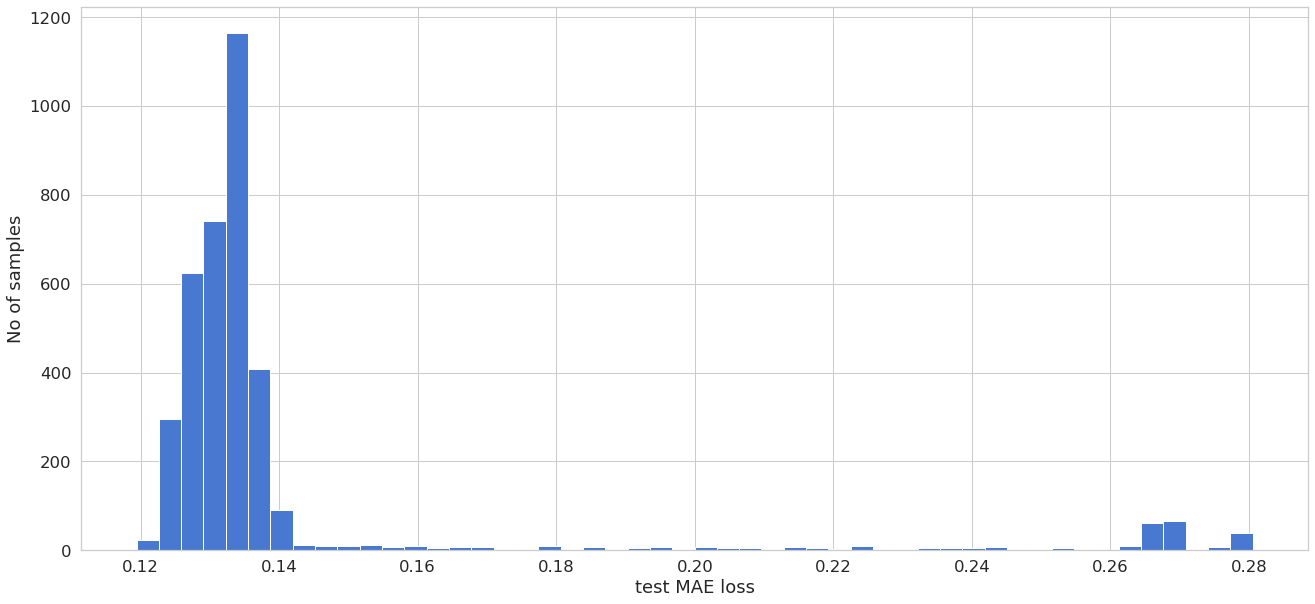

Number of anomaly samples:  390
Indices of anomaly samples:  (array([2701, 2702, 2703, 2704, 2705, 2706, 2708, 2709, 2710, 2711, 2713,
       2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724,
       2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735,
       2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746,
       2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757,
       2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768,
       2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779,
       2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790,
       2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801,
       2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812,
       2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823,
       2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834,
       2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2

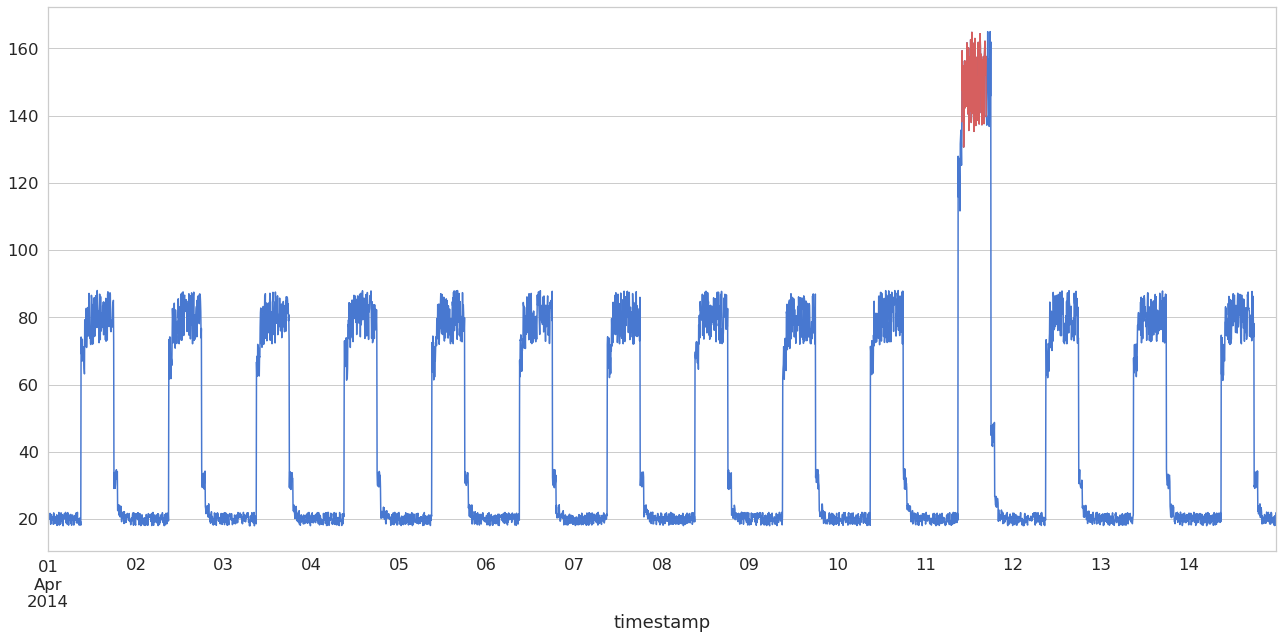

In [257]:
from ipynb.fs.full.AnomalyDetectionConv1DAutoencoder import *

# Time Series Anomaly Detection with LSTM Autoencoders (selected sender)

In [32]:
def get_trained_period(anomalyEnc):
    return anomalyEnc.train.index[0], anomalyEnc.train.index[len(anomalyEnc.train.index)-1]

def get_test_period(anomalyEnc):
    return anomalyEnc.test.index[0], anomalyEnc.test.index[len(anomalyEnc.test) -1]

def get_period(pfall,percent = 1.0):
    max_index = int(len(pfall1) * percent)
    return pfall.iloc[pfall.index[0]]['date'], pfall.iloc[pfall.index[max_index -1]]['date']

def get_percent(pfall1,year=None,month=None,day=None,hour=None):
    _pfall = pfall1[(pfall1['year'] == year) & (pfall1['month'] == month)]
    if day != None:
        _pfall = _pfall[(_pfall['day'] == day)]
    if hour != None:
        _pfall = _pfall[(_pfall['hour'] == hour)]
    
    index = _pfall.index[len(_pfall.index)-1]    
    #print(index)
    index = pfall1.index.get_loc(index)
    
    return (index + 1) / len(pfall1)
    #return _pfall.index
    
def get_index_period(pfall):
    max_index = int(len(pfall) * percent) -1
    return pfall.index[0], pfall.index[max_index]
    


In [ ]:
    
print(get_trained_period(anomalyEnc1), get_test_period(anomalyEnc1))
print(get_trained_period(anomalyEnc2), get_test_period(anomalyEnc2))
print(get_trained_period(anomalyEnc3), get_test_period(anomalyEnc3))
print(get_trained_period(anomalyEnc4), get_test_period(anomalyEnc4))
#print(get_period(pfall1,0.7))
#get_percent(pfall1,year=2022,month=6,day=None,hour=None)

In [ ]:
_pfall = pda_hour
_pfall.index[len(_pfall.index)-1]
_pfall.index.get_loc('2022-10-06-23')
#get_percent(pda_hour,year=2022,month=6,day=None,hour=None)
len(_pfall.index)-1

index = _pfall.index.get_loc('2022-06-30-23')
#(index + 1) , len(_pfall)
index, len(_pfall)
get_percent(pda_hour,year=2022,month=6,day=None,hour=None)


In [ ]:
anomalyEnc.train.index
pfall1.iloc[17908 - 1]
#int(len(pfall1) * TRAIN_SIZE)
pfall1
#int(len(pfall1) * 1.0)
year = 2022
month = 10
day = 4
hour = 23
index = pfall1[(pfall1['year'] == year) & (pfall1['month'] == month) & (pfall1['day'] == day) & (pfall1['hour'] == hour)].index[0]
(index + 1) / len(pfall1)

print(get_period(pfall1,get_percent(pfall1,year=2022,month=6,day=None,hour=None)))
#len(get_percent(pfall1,year=2022,month=10,day=None,hour=None))

In [ ]:
TRAIN_SIZE = 0.7
train_size = int(len(pfall1) * TRAIN_SIZE)
test_size = len(pfall1) - TRAIN_SIZE

### train models

In [112]:
def replace_index_by_date_column(df,column='date'):
    df.set_index(df[column], inplace=True)
    #del df['index']
    #del df['date']
    return df


In [23]:
import AnomalyDetectionLSTMAutoencoder

def train_model(dataframe=None, time_steps=30, year=2022,month=6,day=None,hour=None):
    anomalyEnc = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = time_steps)
    #anomalyEnc.initAndTrain_divide(dataframe, get_percent(dataframe,year=year,month=month,day=day,hour=hour))
    
    anomalyEnc.df1 = anomalyEnc.createDataframe(dataframe)
    perc_train = get_percent(dataframe,year=year,month=month,day=day,hour=hour)
    train, test = anomalyEnc.getTrainAndTest(anomalyEnc.df1,perc_train)
    anomalyEnc.initAndTrain(train=train, test=test)
    
    return anomalyEnc

Setup Complete


In [24]:
def numpy_to_dataframe(b):
    _df = pd.DataFrame()
    _df['outcome'] = b.reshape([1, len(b)])[0]
    return _df

In [ ]:
anomalyEnc2 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
spx_df.columns = ['outcome']
anomalyEnc2.df1 = anomalyEnc2.createDataframe(spx_df)
train, test = anomalyEnc2.getTrainAndTest(anomalyEnc2.df1,0.7)
anomalyEnc2.initAndTrain(train=train, test=test)

In [ ]:
test

In [ ]:
spx_df.columns = ['outcome']

anomalyEnc2 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
anomalyEnc2.initAndTrain_divide(spx_df,0.7)

In [ ]:
normal_cycle = numpy_to_dataframe(ecg[5000:])
test = numpy_to_dataframe(ecg[:5000])

anomalyEnc = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 100, OUTCOME='outcome')
anomalyEnc.initAndTrain(train=normal_cycle, test=test)

In [ ]:
anomalyEnc.OUTCOME
anomalyEnc.initAndTrain(train=normal_cycle, test=test)

In [ ]:
train= normal_cycle

scaler = StandardScaler()
scaler.fit(train[['outcome']])
train[['outcome']]

In [ ]:
replace_index_by_date_column(pda_CINBOUNDSIZE_hour)
pda_CINBOUNDSIZE_hour

In [ ]:
anomalyEnc7 = train_model(dataframe=pda_CINBOUNDSIZE_hour, time_steps=24 * 7, year=2022,month=6)

In [28]:
replace_index_by_date_column(pda_hour)
#replace_index_by_date_column(pda_CMESSAGETAT2_hour)
#replace_index_by_date_column(pda_day)
#replace_index_by_date_column(pda_CMESSAGETAT2_day)

### Convolutional

In [459]:
perc_train = get_percent(pda_hour,year=2022,month=10)

pda_hour_1 = pd.DataFrame()
pda_hour_1['value'] = pda_hour['outcome']
_df = pda_hour_1
train_size = int(len(_df) * perc_train)
test_size = len(_df) - train_size
train, test = _df.iloc[0:train_size], _df.iloc[train_size:len(_df)]

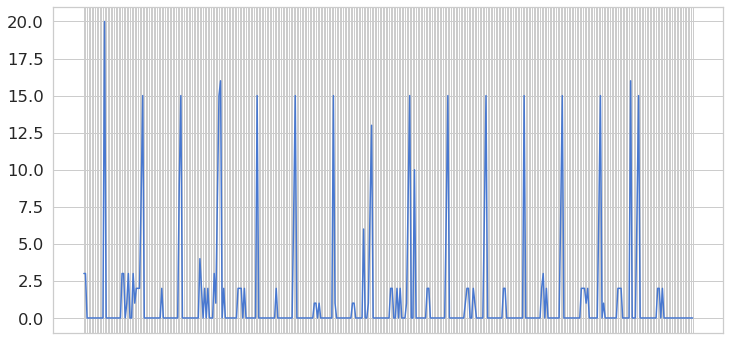

In [460]:
fig = plt.figure(figsize=(12,6))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
#plt.plot(pda_hour.index,pda_hour['outcome'])
#plt.plot(train.index,train['value'])
plt.plot(test.index,test['value'])
plt.show()

In [461]:
len(train)
test

,value
date,
2022-11-01-00,3
2022-11-01-01,3
2022-11-01-02,0
2022-11-01-03,0
2022-11-01-04,0
...,...
2022-11-16-19,0
2022-11-16-20,0
2022-11-16-21,0


In [462]:
#anomay_enc_Con4 = AnomalyDetectionConv1DAutoencoder(pda_hour, time_steps=24)
anomay_enc_Con4 = AnomalyDetectionConv1DAutoencoder(train, time_steps=240)

Number of training samples: 26376
Training input shape:  (26137, 240, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 120, 32)           256       
                                                                 
 dropout_22 (Dropout)        (None, 120, 32)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 60, 16)            3600      
                                                                 
 conv1d_transpose_21 (Conv1D  (None, 120, 16)          1808      
 Transpose)                                                      
                                                                 
 dropout_23 (Dropout)        (None, 120, 16)           0         
                                                                 
 conv1d_transpose_22 (Conv1D  (None, 240, 32) 

794/794 [==============================] - 3s 3ms/step


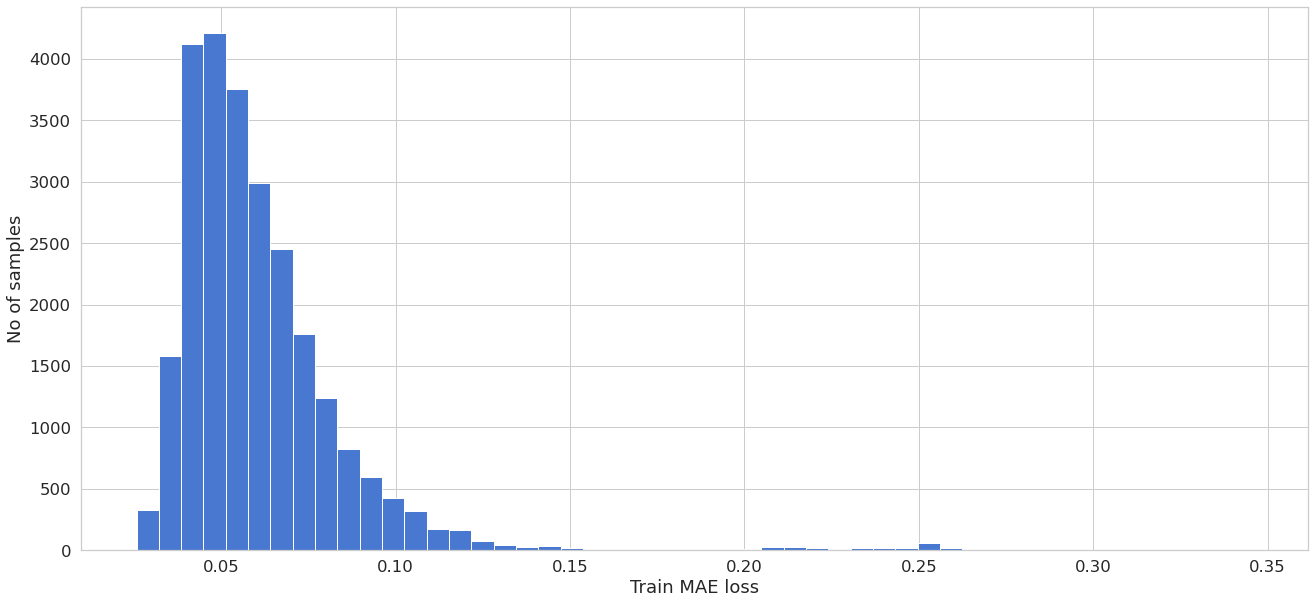

Reconstruction error threshold:  0.34563763069091635


In [451]:
anomay_enc = anomay_enc_Con4

# Get train MAE loss.
x_train_pred = anomay_enc.model.predict(anomay_enc.x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - anomay_enc.x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

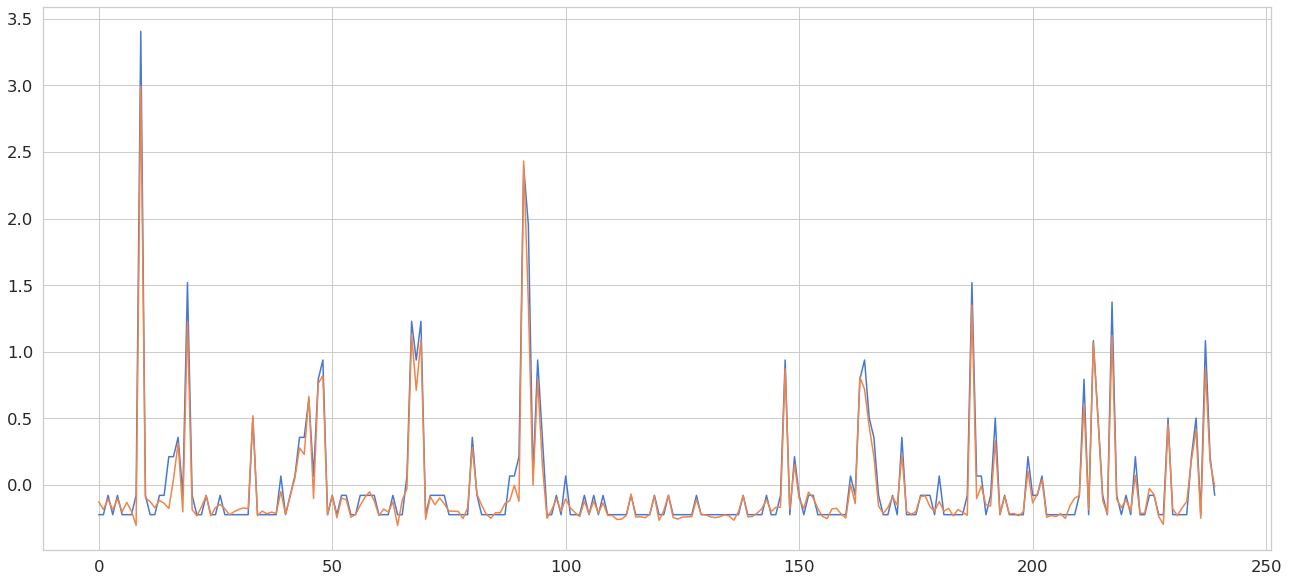

In [452]:
plt.plot(anomay_enc.x_train[1000])
plt.plot(x_train_pred[1000])
plt.show()

In [453]:
pd.unique(test['value'])

array([ 0,  2, 66, 28,  3,  6, 31, 22,  4, 16,  1, 12,  8,  5, 10, 13, 15,
       50,  7, 11, 17, 68, 46, 20,  9, 23, 14, 30])

In [454]:
len(x_test_pred) + 240, len(df_test_value), len(test)
train

,value
date,
2019-10-29-00,0
2019-10-29-01,0
2019-10-29-02,0
2019-10-29-03,0
2019-10-29-04,0
...,...
2022-09-30-19,0
2022-09-30-20,0
2022-09-30-21,0


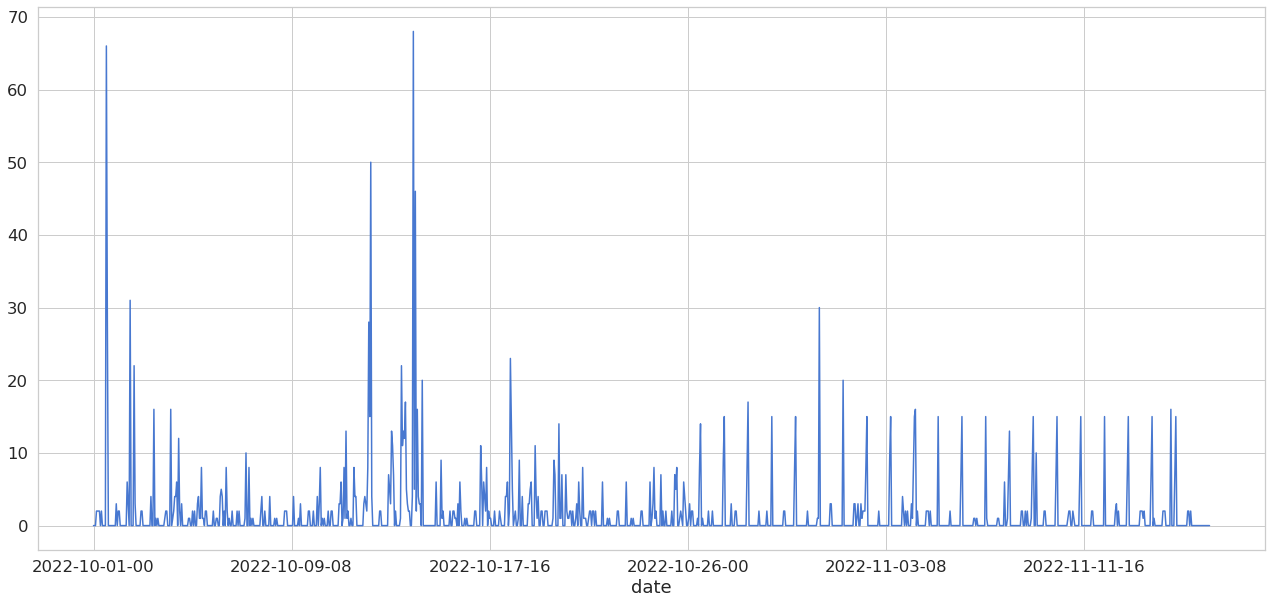

Test input shape:  (889, 240, 1)
28/28 [==============================] - 0s 4ms/step


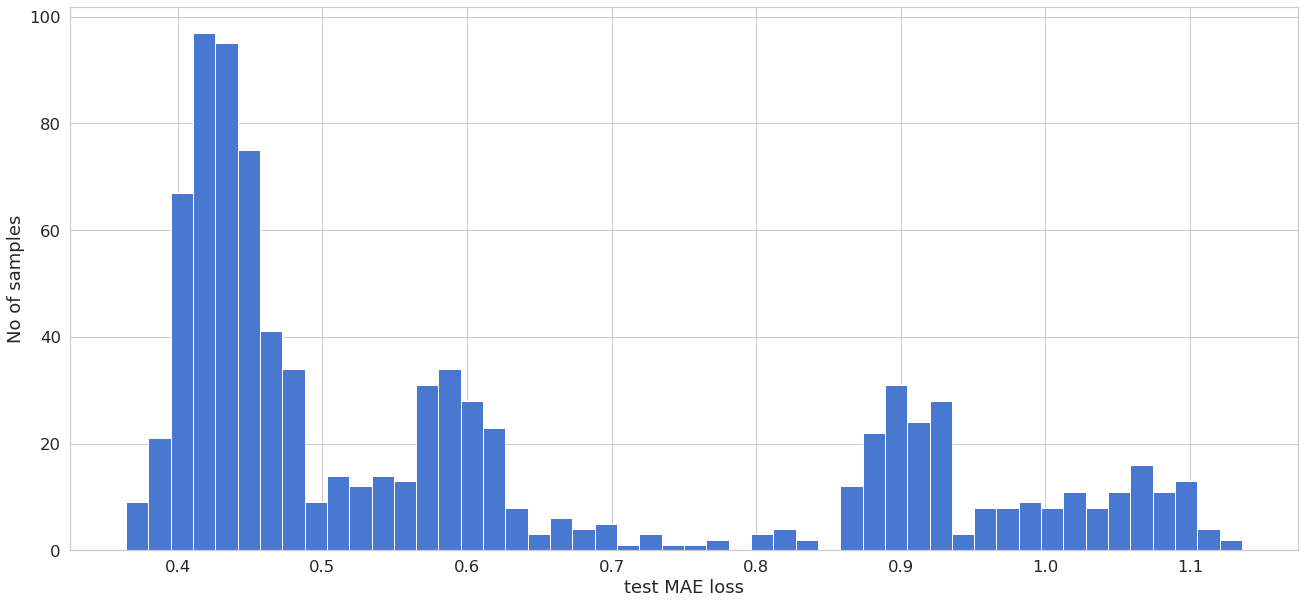

Number of anomaly samples:  889
Indices of anomaly samples:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
  

In [455]:
df=train
training_mean = df.mean()
training_std = df.std()

df_test_value = test
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = anomay_enc.create_sequences(df_test_value.values,time_steps=240)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = anomay_enc.model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [458]:
#threshold
#anomalies[anomalies == False]

<bound method Callback.on_batch_end of <keras.callbacks.History object at 0x7fcbb8666730>>

In [ ]:
anomay_enc

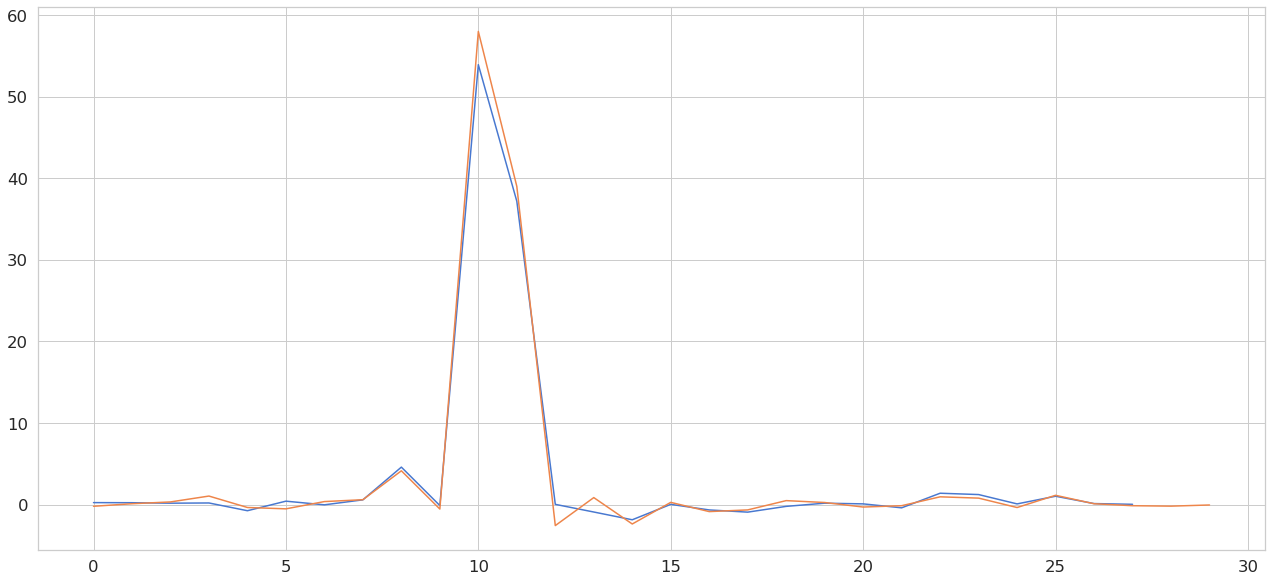

In [403]:
len(x_test_pred[0])
fig, ax = plt.subplots()

plt.plot(x_test_pred[0][2:30])
#plt.plot(x_test_pred[1][1:30])
plt.plot(x_test_pred[2][:30])
#plt.plot(list(test['value'])[2:30])

plt.show()


In [409]:
#test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
#test_mae_loss = test_mae_loss.reshape((-1))
test_mae_loss

array([0.63858782, 0.6497609 , 0.61721118, ..., 0.41786708, 0.37082642,
       0.43712628])

In [385]:
list(test['value'])[1:30]

[2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 5,
 2,
 62,
 47,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0]

In [374]:
x_test_pred[0][:5], x_test_pred[1][:5]

(array([[ 0.6954532 ],
        [-0.06103374],
        [ 0.2443805 ],
        [ 0.23235077],
        [ 0.17466706]], dtype=float32),
 array([[ 0.1381003 ],
        [-0.33505583],
        [ 0.10020433],
        [-0.23338532],
        [-0.15584642]], dtype=float32))

In [332]:
#anomalies
len(test_mae_loss), len(test), len(df_test_value), len(x_test)

(3097, 3336, 3336, 3097)

In [449]:
TIME_STEPS = 240
df_test_value = _test
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

In [448]:
_test = test[test.index.str.contains('2022-07-1')]
_test = test

In [341]:
_test.iloc[anomalous_data_indices]

,value
date,
2022-07-10-23,0
2022-07-11-00,2
2022-07-11-01,2
2022-07-11-02,0
2022-07-11-03,0
...,...
2022-11-06-20,0
2022-11-06-21,0
2022-11-06-22,0


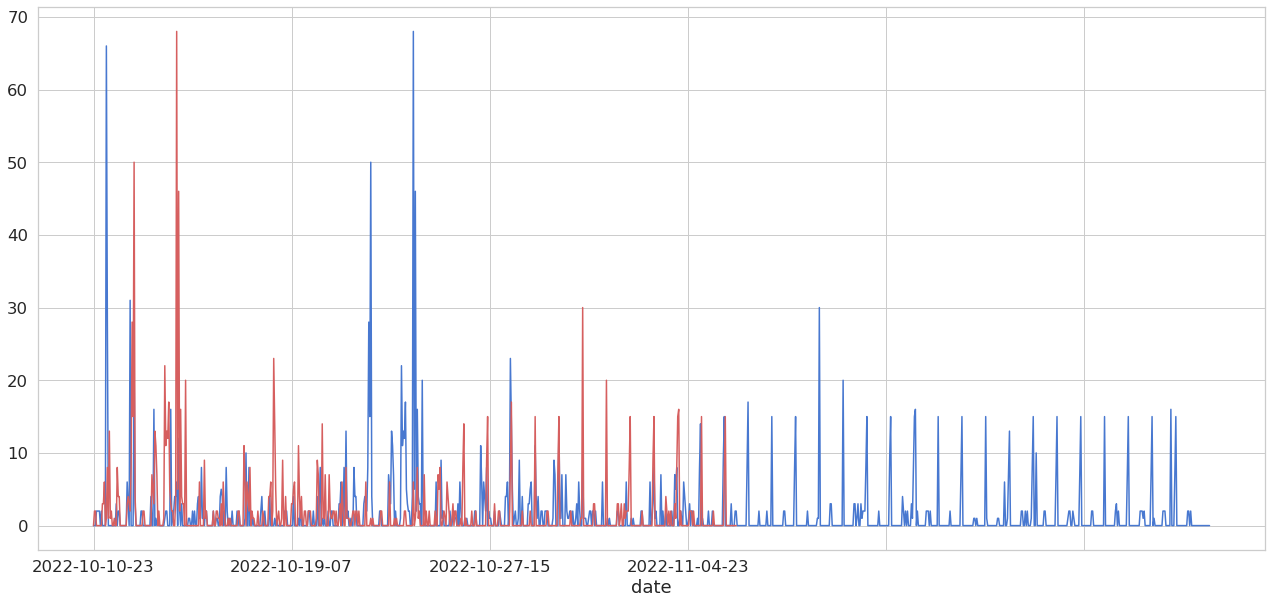

In [450]:
df_subset = _test.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
_test.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

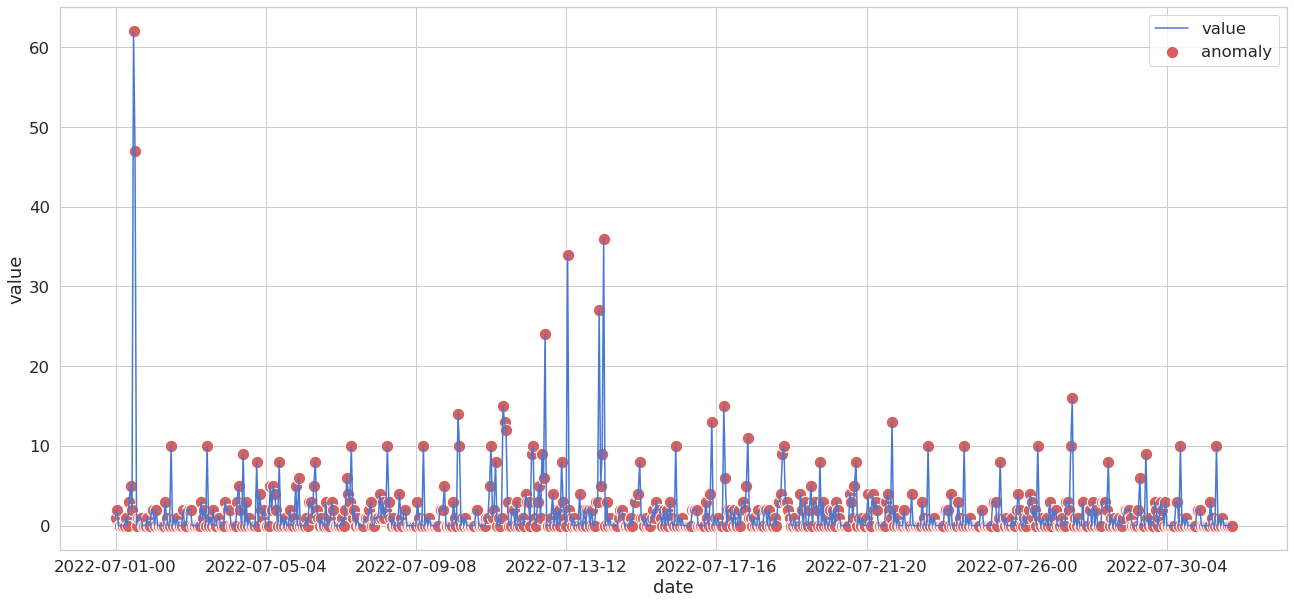

In [437]:
fig, ax = plt.subplots()
_test[_test.index.str.contains('2022-07')].plot(legend=False, ax=ax)
_df_subset = df_subset[df_subset.index.str.contains('2022-07')]
#_df_subset.plot(legend=False, ax=ax)
fx = scatterplot(_df_subset.index, _df_subset['value'], 'anomaly') 
plt.show()

In [354]:
df_subset

,value
date,
2022-07-10-23,0
2022-07-11-00,2
2022-07-11-01,2
2022-07-11-02,0
2022-07-11-03,0
...,...
2022-11-06-20,0
2022-11-06-21,0
2022-11-06-22,0


In [352]:
df_subset.index

Index(['2022-07-10-23', '2022-07-11-00', '2022-07-11-01', '2022-07-11-02',
       '2022-07-11-03', '2022-07-11-04', '2022-07-11-05', '2022-07-11-06',
       '2022-07-11-07', '2022-07-11-08',
       ...
       '2022-11-06-15', '2022-11-06-16', '2022-11-06-17', '2022-11-06-18',
       '2022-11-06-19', '2022-11-06-20', '2022-11-06-21', '2022-11-06-22',
       '2022-11-06-23', '2022-11-07-00'],
      dtype='object', name='date', length=2858)

In [188]:
anomalyEncB6 = train_model(dataframe=_pda_hour, time_steps=24, year=2022,month=6)

Epoch 1/10
295/295 [==============================] - 12s 30ms/step - loss: 0.2138 - val_loss: 0.2069
Epoch 2/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2119 - val_loss: 0.2063
Epoch 3/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2119 - val_loss: 0.2063
Epoch 4/10
295/295 [==============================] - 8s 28ms/step - loss: 0.2115 - val_loss: 0.2062
Epoch 5/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2113 - val_loss: 0.2062
Epoch 6/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2112 - val_loss: 0.2061
Epoch 7/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2110 - val_loss: 0.2060
Epoch 8/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2110 - val_loss: 0.2060
Epoch 9/10
295/295 [==============================] - 8s 26ms/step - loss: 0.2109 - val_loss: 0.2060
Epoch 10/10
328/328 [==============================] - 4s 9ms/step


In [ ]:
anomalyEncC1 = train_model(dataframe=pda_CMESSAGETAT2_day, time_steps=30, year=2022,month=6)
anomalyEncC2 = train_model(dataframe=pda_day, time_steps=30, year=2022,month=6)

anomalyEncC3 = train_model(dataframe=pda_CMESSAGETAT2_hour, time_steps=24 * 7, year=2022,month=6)
anomalyEncC4 = train_model(dataframe=pda_hour, time_steps=24 * 7, year=2022,month=6)

anomalyEncC5 = train_model(dataframe=pda_CMESSAGETAT2_hour, time_steps=24, year=2022,month=6)
anomalyEncC6 = train_model(dataframe=pda_hour, time_steps=24, year=2022,month=6)

In [226]:
anomalyEncC4 = train_model(dataframe=pda_hour, time_steps=24 * 7, year=2022,month=6)

Epoch 1/10
655/655 [==============================] - 115s 170ms/step - loss: 0.2121 - val_loss: 0.2517
Epoch 2/10
655/655 [==============================] - 107s 163ms/step - loss: 0.2099 - val_loss: 0.2501
Epoch 3/10
655/655 [==============================] - 109s 166ms/step - loss: 0.2087 - val_loss: 0.2479
Epoch 4/10
655/655 [==============================] - 107s 164ms/step - loss: 0.2080 - val_loss: 0.2493
Epoch 5/10
655/655 [==============================] - 107s 163ms/step - loss: 0.2071 - val_loss: 0.2486
Epoch 6/10
655/655 [==============================] - 108s 165ms/step - loss: 0.2051 - val_loss: 0.2448
Epoch 7/10
655/655 [==============================] - 108s 165ms/step - loss: 0.2051 - val_loss: 0.2463
Epoch 8/10
655/655 [==============================] - 109s 166ms/step - loss: 0.2035 - val_loss: 0.2476
Epoch 9/10
655/655 [==============================] - 109s 166ms/step - loss: 0.2059 - val_loss: 0.2525
Epoch 10/10
727/727 [==============================] - 36s 48ms/

In [206]:
anomalyEncC6 = train_model(dataframe=pda_hour, time_steps=24, year=2022,month=6)
#pda_hour
#pfall

Epoch 1/10
659/659 [==============================] - 22s 29ms/step - loss: 0.2123 - val_loss: 0.2513
Epoch 2/10
659/659 [==============================] - 17s 26ms/step - loss: 0.2092 - val_loss: 0.2480
Epoch 3/10
659/659 [==============================] - 17s 26ms/step - loss: 0.2079 - val_loss: 0.2417
Epoch 4/10
659/659 [==============================] - 18s 27ms/step - loss: 0.2051 - val_loss: 0.2394
Epoch 5/10
659/659 [==============================] - 18s 27ms/step - loss: 0.2035 - val_loss: 0.2379
Epoch 6/10
659/659 [==============================] - 17s 26ms/step - loss: 0.2027 - val_loss: 0.2356
Epoch 7/10
659/659 [==============================] - 17s 27ms/step - loss: 0.2017 - val_loss: 0.2395
Epoch 8/10
659/659 [==============================] - 18s 27ms/step - loss: 0.2002 - val_loss: 0.2295
Epoch 9/10
659/659 [==============================] - 17s 26ms/step - loss: 0.1990 - val_loss: 0.2338
Epoch 10/10
732/732 [==============================] - 8s 10ms/step


In [ ]:
#anomalyEnc4 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 24 * 7)
#anomalyEnc4.initAndTrain(pda_hour, get_percent(pda_hour,year=2022,month=6,day=None,hour=None))

In [ ]:
#anomalyEnc3 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 24 * 7)
#anomalyEnc3.initAndTrain(pda_CMESSAGETAT2_hour, get_percent(pda_CMESSAGETAT2_hour,year=2022,month=6,day=None,hour=None))

In [ ]:
# %%capture
#import AnomalyDetectionLSTMAutoencoder
#anomalyEnc2 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
#anomalyEnc2.initAndTrain(pda_CMESSAGETAT2_day,0.7)
#anomalyEnc2.initAndTrain(pda_CMESSAGETAT2_day, get_percent(pda_CMESSAGETAT2_day,year=2022,month=6,day=None,hour=None))

#anomalyEnc1 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
#anomalyEnc1.initAndTrain(pda_day,0.7)
#anomalyEnc1.initAndTrain(pda_day, get_percent(pda_day,year=2022,month=6,day=None,hour=None))

In [ ]:
len(pda_hour)

In [ ]:
get_trained_period(anomalyEnc3)

In [ ]:
len(pfall1),  len(anomalyEnc.train), len(anomalyEnc.test), len(anomalyEnc.y_test), len(anomalyEnc.df1), len(anomalyEnc.train), len(anomalyEnc.test),anomalyEnc.TIME_STEPS, len(anomalyEnc.X_train), len(anomalyEnc.y_train)

In [ ]:
# %%capture
import numpy as np

#anomalyEnc.test_score_df      = anomalyEnc.testScoreDF(anomalyEnc.model, 0.0, anomalyEnc.X_test, anomalyEnc.test)

#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
#data = plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.loss, label='loss')

#y=plt.getp(data[0],'ydata')

#threshold_X = 0.98 * np.max(y)
#threshold_X = np.max(y) - 0.0001
#anomalyEnc.evaluateAnomalies(threshold_X)


data = sns.distplot(anomalyEnc2.train_mae_loss, bins=50, kde=True).get_lines()[0].get_data()

In [199]:
import numpy as np
import ipywidgets as widgets
style = {'description_width': '250px'}
layout = {'width': '600px'}
from IPython.display import display, clear_output

#anomalyEnc.test_score_df      = anomalyEnc.testScoreDF(anomalyEnc.model, 0.0, anomalyEnc.X_test, anomalyEnc.test)

def getThreshold(perc,anomalyEnc):
    out2 = widgets.Output()
    with out2:
        anomalyEnc.test_score_df      = anomalyEnc.testScoreDF(anomalyEnc.model, 0.0, anomalyEnc.X_test, anomalyEnc.test)
        fig = plt.figure(figsize=(12,6))
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
        data = plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.loss, label='loss')
        y=plt.getp(data[0],'ydata')
        plt.show(fig)

    #threshold_X = np.max(y) - 0.025
    return perc * np.max(y)

#out2 = widgets.Output()
#with out2:
#    threshold_X = getThreshold(0.88)
    
#threshold_X    

#anomalyEnc.evaluateAnomalies(threshold_X)

In [ ]:
#anomalyEnc1.X_test

In [ ]:
nomalyEnc2.test_score_df      = anomalyEnc2.testScoreDF(anomalyEnc2.model, 0.0, anomalyEnc2.X_test, anomalyEnc2.test)

In [200]:
def scatterplot(index, values,label):
    return sns.scatterplot(
      x=index,
      y=values,
      color=sns.color_palette()[3],
      s=152,
      label=label
    )
    
def plot_test(test,scaler,anomalies,titlestring,xlabel):

    fig = plt.figure(figsize=(18,9))
    
    plt.plot(
      test[anomalyEnc.TIME_STEPS:].index, 
      #scaler.inverse_transform(test[TIME_STEPS:].close), 
      scaler.inverse_transform(test[anomalyEnc.TIME_STEPS:]),   
      label='msg count'
    );

    #ax = scatterplot(anomalyEnc.anomalies.index, anomalyEnc.scaler.inverse_transform(anomalyEnc.anomalies['close']), 'anomaly')  
    #ax = scatterplot(anomalyEnc.anomalies.index, anomalyEnc.scaler.inverse_transform(anomalyEnc.anomalies), 'anomaly')
    _a=anomalyEnc.anomalies['close']
    _a = pd.DataFrame(_a)
    _a = anomalyEnc.scaler.inverse_transform(_a)
    _a = _a[:, 0]
    #print(_a,type(_a),_a[0],len(_a),len(_a[:, 0]))
    ax = scatterplot(anomalyEnc.anomalies.index, _a, 'anomaly') 
    
    ax.set_xlabel(xlabel)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    plt.xticks(rotation=25)
    plt.legend();

    label(ax,5,80)
    plt.title(titlestring)
    plt.show(fig)


In [ ]:
anomalyEnc.anomalies.index

In [ ]:
anomalyEnc3.anomalies

### Problems / Erwartungsmonitoring

- am 12.07.2022 wurde ein BIS Release installiert dass zur Verzögerung vieler Nachrichten geführt hat.
Die letzten Nachrichten wurden am Folgetag um ca. 15:00 Uhr CET verarbeitet.
Es sollten also deutliche Anomalien zwischen 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) zu sehen sein.


- 13.09.2022 19:00 Uhr / 20:00 Uhr UTC: Massive Last, Anflutung des Systems, vor allem im zweiten Intervall.
Durchlaufzeiten waren deutlich erhöht. 


In [ ]:
data3 = pda_CMESSAGETAT2_hour
_df = pd.DataFrame()        
_df['outcome'] = data3['outcome']
_df.set_index(data3['date'], inplace=True)

In [ ]:
pda_CMESSAGETAT2_hour.set_index(pda_CMESSAGETAT2_hour['date'], inplace=True)

In [ ]:
_df = pda_CMESSAGETAT2_hour
_df = pda_hour

In [ ]:
_df2.index[_df2.index.str.contains('-00')]

In [ ]:
pda_hour

### Problems / Erwartungsmonitoring

- am 12.07.2022 wurde ein BIS Release installiert dass zur Verzögerung vieler Nachrichten geführt hat.
Die letzten Nachrichten wurden am Folgetag um ca. 15:00 Uhr CET verarbeitet.
Es sollten also deutliche Anomalien zwischen 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) zu sehen sein.


- 13.09.2022 19:00 Uhr / 20:00 Uhr UTC: Massive Last, Anflutung des Systems, vor allem im zweiten Intervall.
Durchlaufzeiten waren deutlich erhöht. 


### plot graphs

In [107]:
def plot_graph(_df,contains=None, y='outcome'):
    _df2 = _df[_df.index.str.contains(contains)]

    fig = plt.figure(figsize=(18,9))
    
    hours= False
    
    plt.plot(_df2.index, _df2[y], label=y)
    if len(_df2.index[0].split('-')) == 4:
        hours = True
        ticks=_df2.index[_df2.index.str.contains('-00')]
        ticks2 = list(ticks)
        ticks2.append('2022-07-12-10')
        ticks2.append('2022-07-13-15')
        ticks2.sort()
        ticks = ticks2
    elif len(_df2.index[0].split('-')) == 3:
        ticks=list(_df2.index[_df2.index.str.contains('-01')])  
        for day in range(2,10):
            ticks.remove('2022-01-0' + str(day))
        for day in range(10,32):
            ticks.remove('2022-01-' + str(day)) 
        b=(len(ticks)-1)    
        ticks = ticks[:6] + ['2022-07-12'] + ticks[6:b]     
    else:
        ticks=_df2.index
    #ticks=[_df2.index[0]]
    
    #12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr)
    if hours == False:
        plt.axvline(x='2022-07-12', color="red")
        plt.axvline(x='2022-09-13', color="red")
    else:    
         plt.axvline(x='2022-07-12-10', color="red")
         plt.axvline(x='2022-07-13-15', color="red")
         #plt.axvline(x='2022-09-13-19', color="red")
         #plt.axvline(x='2022-09-13-20', color="red")
       
    #print(ticks)
    
    plt.legend();
    plt.xticks(rotation=80,ticks=ticks)
    plt.show(fig)
    return ticks    



def plot_graph2(test=None, expect=None, column_y='outcome',contains=None, date_from=None, date_to=None):
        
    _test =test
    
    if contains is not None:
        _test = _test[_test.index.str.contains(contains)]
        #anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _test.index.get_loc(date_from)
        _to_index   = _test.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _test = _test.iloc[_from_index:_to_index + 1]
    else:
        pass    
            
    fig = plt.figure(figsize=(18,9))
    plt.plot(_test.index, _test[column_y])       
    
    ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    plt.xticks(rotation=80,ticks=ticks)
    
    if expect is not None:
        #print(_test.index.get_loc(expect[0]),_test.index.get_loc(expect[1]))
        e1=_test.index.get_loc(expect[0])
        e2=_test.index.get_loc(expect[1])
        x = np.arange(e1,e2)
        #x = np.arange(expect[0],expect[1])
        _max = np.max(_test[column_y])
        y1 = [0]*len(x)
        y2 = [_max]*len(x)
        plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
    plt.show()

In [ ]:
#_date = get_ymdh_string(pfall4['year'], pfall4['month'], pfall4['day'],pfall4['hour'])

In [ ]:
pfall4 = pfall[(pfall['year']==2022) & ((pfall['month']==7) | (pfall['month']==6))].reset_index()

In [ ]:
pfall4.columns
#pfall4

In [ ]:
_dates = get_date_list(pfall, hours=False)
#_dates

In [ ]:
_column = 'CSLATAT'
pfall6=checka(pfall4, outcome=_column )
pfall6.set_index(pfall6['date'], inplace=True)

In [ ]:
_column = 'CINBOUNDSIZE'
pfall6=checka(pfall4, outcome=_column )
pfall6.set_index(pfall6['date'], inplace=True)

In [ ]:
#plot_graph(pfall6, contains = '2022-', y=_column ) 
ticks = plot_graph(pfall6, contains = '2022-07-1', y=_column )   

In [ ]:

_column = 'CINBOUNDSIZE'
pfall7 = pda_CINBOUNDSIZE_hour[(pda_CINBOUNDSIZE_hour['year']==2022) & ((pda_CINBOUNDSIZE_hour['month']==7) | (pda_CINBOUNDSIZE_hour['month']==6))].reset_index()
pfall7=checka(pfall7 )
pfall7.set_index(pfall7['date'], inplace=True)

In [ ]:
#pfall7
ticks = plot_graph(pfall7, contains = '2022-07-1', y='outcome' )  

In [ ]:
pfall7[pfall7['outcome'] == 0]

In [ ]:
#data2
#pfall4
#pd.concat([pfall4, _date], axis=1)
#pfall4.set_index(_date, inplace=True)

pfall4['date'] = _date
pfall4

In [ ]:
pfall4.loc['2022-07-07-08']

In [ ]:
pfall4 = pfall4.reset_index()

In [ ]:
plot_graph(pda_day, contains = '2022-')   
plot_graph(pda_CMESSAGETAT2_day, contains = '2022-')  
plot_graph(pda_hour, contains = '2022-07')   
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-07')  

In [ ]:
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-07')  

In [ ]:
plot_graph(pda_hour, contains = '2022-07-')    
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-07-')        
plot_graph(pda_hour, contains = '2022-09-')    
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-09-')    

### filtered plot

In [198]:
def inverse_transform_anomalies(scaler=None,anomalies=None, column_y='close'):
    _a = anomalies[column_y]
    _a = pd.DataFrame(_a)
    _a = scaler.inverse_transform(_a)
    _a = _a[:, 0]
    return _a

def filtered_plot(test=None,scaler=None,anomalies=None,TIME_STEPS=None,contains=None, date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80):
    #_df2 = test[TIME_STEPS:]
    _df2 = test
    
    if contains is not None:
        _df2 = _df2[_df2.index.str.contains(contains)]
        anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _df2.index.get_loc(date_from)
        _to_index   = _df2.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _df2 = _df2.iloc[_from_index:_to_index + 1]
        
        anomalies = anomalies.iloc[_from_index:_to_index + 1]
        
        for date in anomalyEnc6.anomalies.index:
            if date >= '2022-07-01-00':
                _min = anomalyEnc6.anomalies.index.get_loc(date)
                break     
        for _max in range(_min,len(anomalyEnc6.anomalies.index)):
            if anomalyEnc6.anomalies.index[_max] > '2022-07-07-23':
                break
        anomalies = anomalies.iloc[_min:_max]         
    else:
        pass
    
    _a = inverse_transform_anomalies(scaler=scaler,anomalies=anomalies, column_y='close')
    
    fig = plt.figure(figsize=(30,12))

    plt.plot(
      _df2.index,  
      scaler.inverse_transform(_df2),   
      label='msg count'
    );

    ax = scatterplot(anomalies.index, _a, 'anomaly') 

    if skip is not None:
        label(ax,skip,rotate)
    
    hours= False
    if len(_df2.index[0].split('-')) == 4:
        hours = True
    if hours == False:
        plt.axvline(x='2022-07-12', color="red")
        #plt.axvline(x='2022-07-13', color="red")
        #plt.axvline(x='2022-09-13', color="red")
    else:    
        plt.axvline(x='2022-07-12-10', color="red")
        plt.axvline(x='2022-07-13-15', color="red")
        #plt.axvline(x='2022-09-13-19', color="red")
        #plt.axvline(x='2022-09-13-20', color="red")
        
    plt.title(titlestring)
    #plt.show(fig)     
        
def filtered_plot_enc(anomalyEnc, contains=None,date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80):     
    return filtered_plot(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,anomalyEnc.TIME_STEPS,contains,date_from, date_to,titlestring,xlabel,skip,rotate)   

In [197]:
def filtered_plot2(test=None,scaler=None,anomalies=None,TIME_STEPS=None,contains=None, date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80, annotations=True, ylabel='msg count'):
    #_df2 = test[TIME_STEPS:]
    _df2 = test
    
    if contains is not None:
        _df2 = _df2[_df2.index.str.contains(contains)]
        anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _df2.index.get_loc(date_from)
        _to_index   = _df2.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _df2 = _df2.iloc[_from_index:_to_index + 1]
       
    else:
        pass
    
    _a = anomalies['close']
    _a = pd.DataFrame(_a)
    _a = scaler.inverse_transform(_a)
    _a = _a[:, 0]
    
    fig = plt.figure(figsize=(30,12))

    plt.plot(
      _df2.index,  
      scaler.inverse_transform(_df2),   
      label=ylabel
    );

    ax = scatterplot(anomalies.index, _a, 'anomaly') 

    if skip is not None:
        label(ax,skip,rotate)
    
    hours= False
    if len(_df2.index[0].split('-')) == 4:
        hours = True
        
    if annotations == True:    
        if hours == False:
            plt.axvline(x='2022-07-12', color="red")
            #plt.axvline(x='2022-07-13', color="red")
            #plt.axvline(x='2022-09-13', color="red")
        else:    
            plt.axvline(x='2022-07-12-10', color="red")
            plt.axvline(x='2022-07-13-15', color="red")
            #plt.axvline(x='2022-09-13-19', color="red")
            #plt.axvline(x='2022-09-13-20', color="red")
        
    plt.title(titlestring)
    #plt.show(fig)     
        

def filtered_plot_enc2(anomalyEnc, contains=None,date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80, annotations=True, ylabel='msg count'):     
    return filtered_plot2(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,anomalyEnc.TIME_STEPS,contains,date_from, date_to,titlestring,xlabel,skip,rotate, annotations=annotations, ylabel=ylabel)   

In [ ]:
filtered_plot_enc2(anomalyEncC5,date_from='2022-09-01-00', date_to='2022-10-03-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEncC6)) + ' , time_steps=24')

In [ ]:
contains='2022-07'
_df2 = anomalyEnc6.anomalies
#_df2[_df2.index.str.contains('2022-07-')]
#len(_df2)
_df2[_df2.index.str.contains(contains)]

In [ ]:
anomalyEnc6.test.loc['2022-10-06-14'].index
_from_index = anomalyEnc6.test.index.get_loc('2022-07-01-00')
_to_index = anomalyEnc6.test.index.get_loc('2022-07-15-00')

#anomalyEnc6.test.iloc[_index]
_from_index,_to_index

In [ ]:
#anomalyEnc6.test.iloc[anomalyEnc6.test.index[_from_index:_to_index + 1]]

#anomalyEnc6.test.iloc[_from_index:_to_index + 1]
for date in anomalyEnc6.anomalies.index:
    if date >= '2022-07-01-00':
        _min = anomalyEnc6.anomalies.index.get_loc(date)
        break     
for _max in range(_min,len(anomalyEnc6.anomalies.index)):
    if anomalyEnc6.anomalies.index[_max] > '2022-07-07-23':
        break
        
_min,_max        

In [ ]:
anomalyEnc6.anomalies.index

In [ ]:
'2022-07-01-00' > '2022-07-07-23'

### Beispiel Anomalie / messages sent / pda hour

In [ ]:
#filtered_plot_enc(anomalyEnc6,'2022-07-0','titlestring','xlabel',skip=100,rotate=80)
filtered_plot_enc(anomalyEnc6,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80)

In [ ]:
filtered_plot_enc(anomalyEnc4,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80)

In [ ]:
anomalyEnc2.anomalies

In [ ]:
filtered_plot(anomalyEnc2.test,anomalyEnc2.scaler,anomalyEnc2.anomalies,anomalyEnc2.TIME_STEPS,'2022-02-','titlestring','xlabel',5,80)   
#filtered_plot_enc(anomalyEnc2,'2022-02-','titlestring','xlabel',5,80) 

#get_period(anomalyEnc2.anomalies)
anomalyEnc2.anomalies.index[0].split('-')


print(get_index_period(anomalyEnc2.anomalies))

In [ ]:
_df2 = anomalyEnc.test[anomalyEnc.TIME_STEPS:]
_df2 = _df2[_df2.index.str.contains('2022-02-')]

fig = plt.figure(figsize=(18,9))

plt.plot(
  _df2.index, 
  #scaler.inverse_transform(test[TIME_STEPS:].close), 
  anomalyEnc.scaler.inverse_transform(_df2),   
  label='msg count'
);

ax = scatterplot(anomalyEnc.anomalies.index, _a, 'anomaly') 

label(ax,5,80)

In [ ]:
_a=anomalyEnc.anomalies['close']
_a = pd.DataFrame(_a)
_a = anomalyEnc.scaler.inverse_transform(_a)
_a = _a[:, 0]
_a

In [ ]:
anomalyEnc.scaler.inverse_transform(anomalyEnc.test[anomalyEnc.TIME_STEPS:])

In [ ]:
anomalyEnc.test[anomalyEnc.TIME_STEPS:].index

In [ ]:
ax = scatterplot(anomalyEnc.anomalies.index, _a, 'anomaly') 

In [ ]:
#anomalyEnc = anomalyEnc2
#plot_test(anomalyEnc2.test,anomalyEnc2.scaler,anomalyEnc2.anomalies,'titlestring', '_xlabel')

filtered_plot(anomalyEnc2.test,anomalyEnc2.scaler,anomalyEnc2.anomalies,anomalyEnc2.TIME_STEPS,'2022-07-1','titlestring','xlabel',70,80) 

In [ ]:
CSENDERENDPOINTID=0
CRECEIVERENDPOINTID=0

In [ ]:
out3 = widgets.Output()

def models_on_change(change):
    global anomalyEnc
    if change['type'] == 'change' and change['name'] == 'value':
        #print(change['new'])
        if change['new'] == 1:
            anomalyEnc = anomalyEnc1
        else:
            anomalyEnc = anomalyEnc2

def draw_graphs():
    with out3:
        clear_output()
        sender = 0
        #titlestring ="endpoint (sending) : " + str(sender) + " ( trained: " +  anomalyEnc.train.index[0] + " -- " + anomalyEnc.train.index[len(anomalyEnc.train.index)-1] + " )"
        #plot_test(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,titlestring)
        
        #fig = plt.figure(figsize=(12,6))
        #plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
        
        # threshold
        #plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.loss, label='loss')
        #plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.threshold, label='threshold')
        
        sender = CSENDERENDPOINTID
        receiver = CRECEIVERENDPOINTID
        titlestring ="endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID) + " ( trained: " +  anomalyEnc.train.index[0] + " -- " + anomalyEnc.train.index[len(anomalyEnc.train.index)-1] + " )"
        _xlabel = 'date: ' + anomalyEnc.test.index[0] + ' -- ' + anomalyEnc.test.index[len(anomalyEnc.test) -1]
        plot_test(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,titlestring, _xlabel)
        display(anomalyEnc.anomalies)
        
        #plt.show(fig)
         
def evaluateAnomalies(threshold_X):
    with out2:
        anomalyEnc.evaluateAnomalies(threshold_X)
        clear_output()
            
            
def on_value_submit_threshold(change):   
    threshold.disabled=True 
    with out3:
        clear_output()
    evaluateAnomalies(float(threshold.value))
    #draw_graphs()
    with out3:
        clear_output()
        display(anomalyEnc.anomalies)
    threshold.disabled=False                
            
def on_value_submit_percent(change):
    global threshold_X
    percent.disabled=True  
    #threshold.disabled=True 
    threshold_X = getThreshold(float(percent.value))
    threshold.value = str(threshold_X)
    percent.disabled=False  
    
percent   = widgets.Text(description = 'percent',value = '0.985', style=style, layout=layout,disabled=False)    
percent.on_submit(on_value_submit_percent)

threshold   = widgets.Text(description = 'threshold',value = '1.0', style=style, layout=layout,disabled=False)    
threshold.on_submit(on_value_submit_threshold)

models = widgets.Dropdown(description='model',options =[1,2], style=style, layout=layout,disabled=False)
models.observe(models_on_change) 

anomalyEnc = anomalyEnc1
display(models,percent,threshold,out3)

### evaluate anomalies

In [193]:
def get_anomalies(anomalyEnc,threshold):
    anomalyEnc.evaluateAnomalies(threshold)
    return anomalyEnc.anomalies

In [ ]:
#getThreshold(1.0,anomalyEncC6)
get_anomalies(anomalyEncC6,4)

In [ ]:
_threshold = getThreshold(1.0,anomalyEnc)

In [ ]:
_anomalies = get_anomalies(anomalyEnc,_threshold * 0.43)
_anomalies

In [ ]:
anomalyEnc.test
_anomalies = anomalyEnc.anomalies
_threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]
_test = anomalyEnc.test[4000:5000]
fig = plt.figure(figsize=(18,9))
plt.plot(_test.index, _test['outcome'])    
ax = scatterplot(_anomalies.index, _anomalies['outcome'], 'anomaly') 

In [ ]:
plot_anomalies(anomalyEnc,test=anomalyEnc.test[4000:],expect=(4200,4400))

### plot_anomalies

In [204]:
def plot_anomalies(anomalyEnc,test=None, expect=None, column_y='outcome',contains=None, date_from=None, date_to=None):
    _anomalies = anomalyEnc.anomalies
    _threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]
    if test is None:
        _test = anomalyEnc.test
    else:
        _test = test
        
    if contains is not None:
        _test = _test[_test.index.str.contains(contains)]
        #anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _test.index.get_loc(date_from)
        _to_index   = _test.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _test = _test.iloc[_from_index:_to_index + 1]
       
    else:
        pass    
        
        
    fig = plt.figure(figsize=(18,9))
    #plt.plot(_test.index, _test[column_y])       
    plt.plot(
      _test.index,  
      anomalyEnc.scaler.inverse_transform( _test),   
      label='msg count'
    );

    _a = inverse_transform_anomalies(scaler=anomalyEnc.scaler,anomalies=_anomalies, column_y='close')
    ax = scatterplot(_anomalies.index, _a, 'anomaly') 
    
    #ax = scatterplot(_anomalies.index, _anomalies[column_y], 'anomaly') 
    
    ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    plt.xticks(rotation=80,ticks=ticks)
    
    if expect is not None:
        #print(_test.index.get_loc(expect[0]),_test.index.get_loc(expect[1]))
        e1=_test.index.get_loc(expect[0])
        e2=_test.index.get_loc(expect[1])
        x = np.arange(e1,e2)
        #x = np.arange(expect[0],expect[1])
        _max = np.max(anomalyEnc.scaler.inverse_transform( _test))
        y1 = [0]*len(x)
        y2 = [_max]*len(x)
        plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
    plt.show()

In [ ]:
_threshold2 = getThreshold(1.0,anomalyEnc2)

In [ ]:
_threshold = getThreshold(1.0,anomalyEnc)
_threshold

In [ ]:
#_anomalies = get_anomalies(anomalyEnc2,0.65)
_anomalies = get_anomalies(anomalyEnc2,_threshold2 * 0.9)
#_anomalies

In [ ]:
_threshold
get_anomalies(anomalyEnc,3.3)

In [ ]:
_threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]
_threshold

### plot_error

In [190]:
def plt_add_anomaly(_df2):
    hours= False
    if len(_df2.index[0].split('-')) == 4:
        hours = True
    if hours == False:
        plt.axvline(x='2022-07-12', color="red")
        #plt.axvline(x='2022-07-13', color="red")
        #plt.axvline(x='2022-09-13', color="red")
    else:    
        plt.axvline(x='2022-07-12-10', color="red")
        plt.axvline(x='2022-07-13-15', color="red")
        #plt.axvline(x='2022-09-13-19', color="red")
        #plt.axvline(x='2022-09-13-20', color="red")

def plot_error(anomalyEnc):
    fig = plt.figure(figsize=(18,9))
    #_test = anomalyEnc.test_score_df.iloc[2050:]
    _test = anomalyEnc.test_score_df
    _threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]

    
    
    plt.plot(_test.index, _test['loss'])   
    plt.axhline(y=_threshold, color="red") 
    
    ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    plt.xticks(rotation=80,ticks=ticks)
    
    plt_add_anomaly(_test)
    
    plt.show(fig)

In [ ]:
plot_error(anomalyEnc)

In [ ]:
plot_error(anomalyEnc2)

### C6

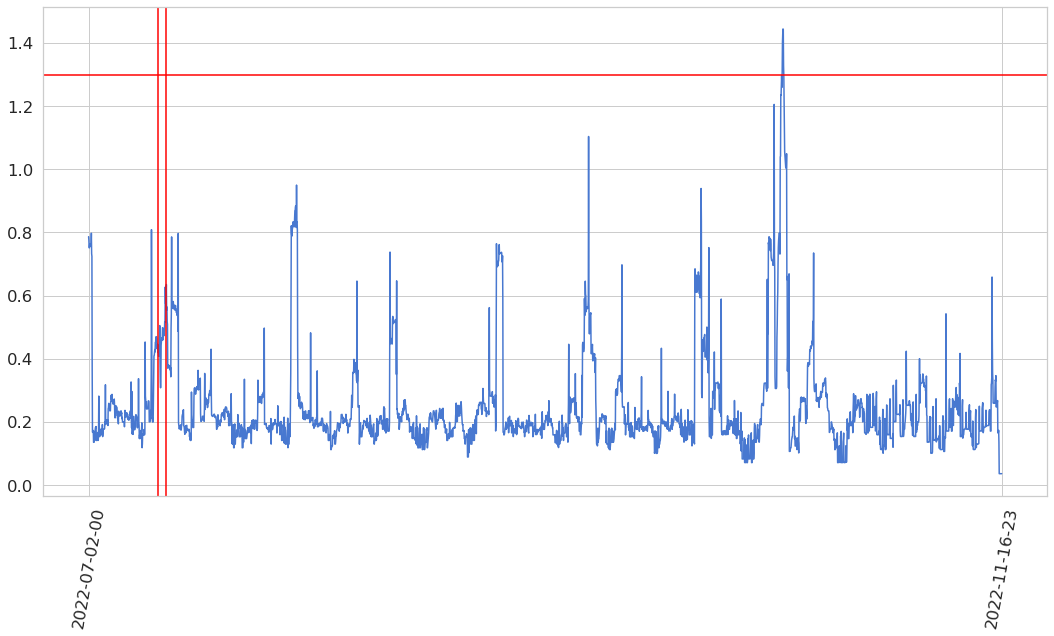

In [209]:
plot_error(anomalyEncC6)
#anomalyEncC1.anomalies

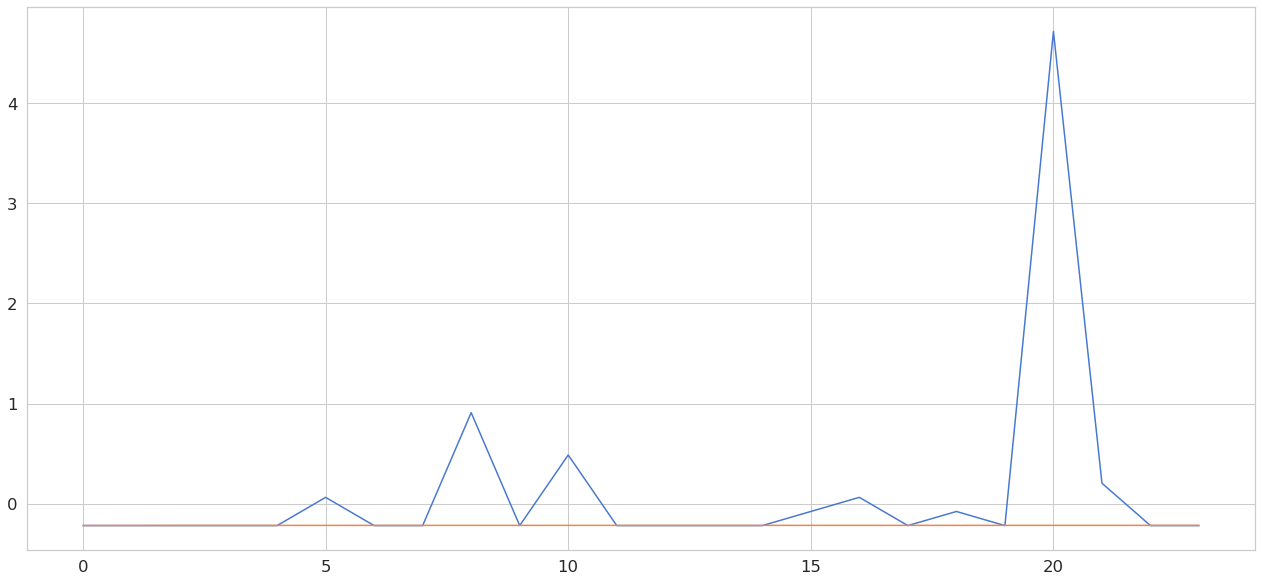

In [246]:
# Checking how the first sequence is learnt
plt.plot(anomalyEncC6.X_train[0])
plt.plot(anomalyEncC6.X_train_pred[0])
plt.show()


In [253]:
anomalyEncC6.X_train_pred[0][:], anomalyEncC6.X_train[0][:]
#anomalyEncC6.__dict__
#anomalyEncC6.X_train_pred[0]

(array([[-0.21447966],
        [-0.21424519],
        [-0.21383123],
        [-0.21377128],
        [-0.21378072],
        [-0.21377306],
        [-0.21375054],
        [-0.21372469],
        [-0.21370153],
        [-0.21368292],
        [-0.21366872],
        [-0.21365815],
        [-0.21365039],
        [-0.21364471],
        [-0.21364056],
        [-0.21363752],
        [-0.2136353 ],
        [-0.21363367],
        [-0.21363248],
        [-0.2136316 ],
        [-0.21363097],
        [-0.21363051],
        [-0.21363017],
        [-0.21362993]], dtype=float32),
 array([[-0.21581105],
        [-0.21581105],
        [-0.21581105],
        [-0.21581105],
        [-0.21581105],
        [ 0.06592322],
        [-0.21581105],
        [-0.21581105],
        [ 0.91112602],
        [-0.21581105],
        [ 0.48852462],
        [-0.21581105],
        [-0.21581105],
        [-0.21581105],
        [-0.21581105],
        [-0.07494391],
        [ 0.06592322],
        [-0.21581105],
        [-0.07494

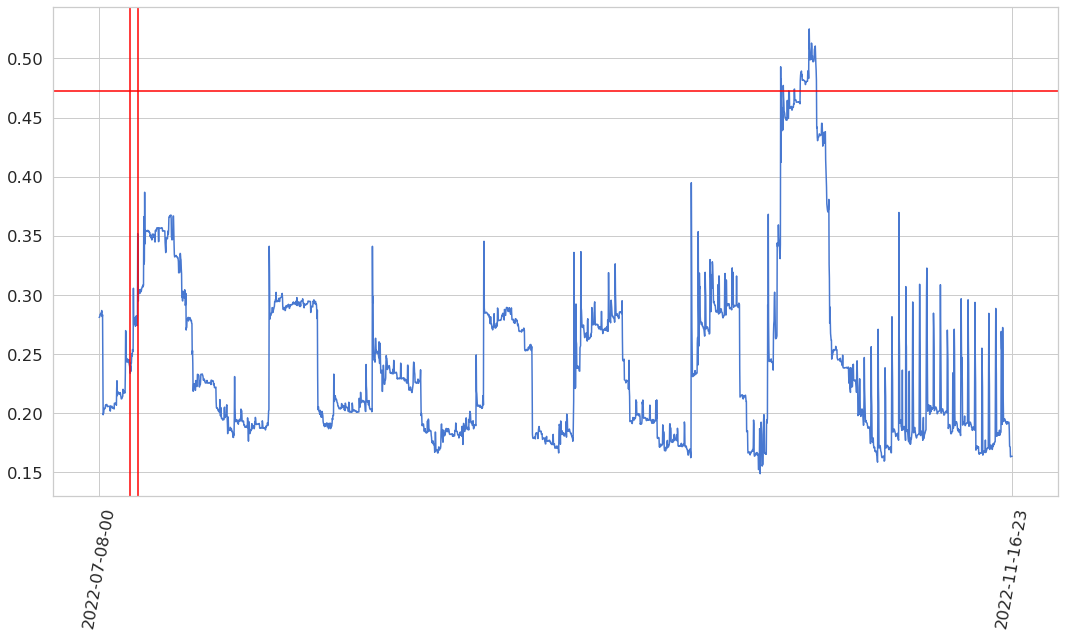

In [228]:
plot_error(anomalyEncC4)

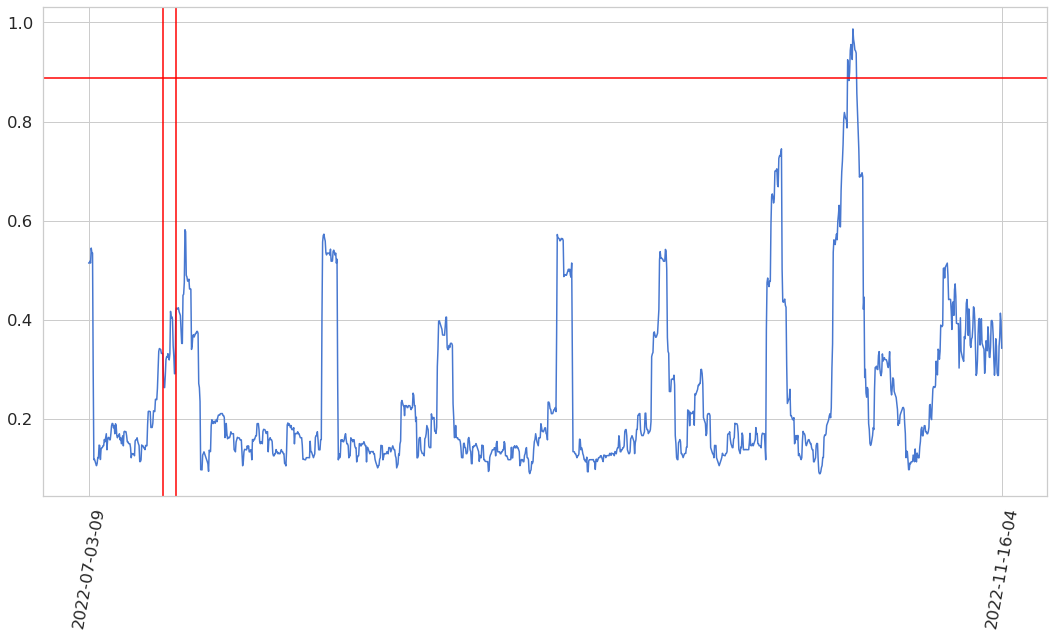

In [205]:
plot_error(anomalyEncB6)

In [208]:
_threshold_C6 = getThreshold(1.0,anomalyEncC6)
get_anomalies(anomalyEncC6,0.9 * _threshold_C6)

104/104 [==============================] - 1s 9ms/step


,loss,close,threshold,anomaly
date,,,,
2022-10-14-19,1.308070,-0.215811,1.300074,True
2022-10-14-20,1.401059,2.601532,1.300074,True
2022-10-14-21,1.428377,-0.215811,1.300074,True
2022-10-14-22,1.444526,-0.215811,1.300074,True
2022-10-14-23,1.442931,-0.215811,1.300074,True
2022-10-15-00,1.328111,-0.215811,1.300074,True


In [227]:
_threshold_C4 = getThreshold(1.0,anomalyEncC4)
get_anomalies(anomalyEncC4,0.9 * _threshold_C4)

99/99 [==============================] - 5s 49ms/step


,loss,close,threshold,anomaly
date,,,,
2022-10-14-12,0.492986,0.488525,0.472498,True
2022-10-14-14,0.482683,0.065923,0.472498,True
2022-10-14-21,0.477212,-0.215811,0.472498,True
2022-10-15-16,0.472626,-0.074944,0.472498,True
2022-10-16-11,0.473963,0.065923,0.472498,True
...,...,...,...,...
2022-10-19-12,0.510529,-0.215811,0.472498,True
2022-10-19-13,0.501254,-0.215811,0.472498,True
2022-10-19-14,0.495140,1.333727,0.472498,True


In [201]:
_threshold = getThreshold(1.0,anomalyEncB6)

In [202]:
#_threshold = getThreshold(1.0,anomalyEncB6)
get_anomalies(anomalyEncB6,0.9 * _threshold)

#plot_anomalies(anomalyEncB6,column_y='close',test=anomalyEncB6.test, expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')
#anomalyEncB6.test.loc['2022-07-12-10']
#anomalyEncB6.test.index[anomalyEncB6.test.index.str.contains('2022-07-12')]
#_pda_hour.index[_pda_hour.index.str.contains('2022-07-12')]

44/44 [==============================] - 0s 9ms/step


,loss,close,threshold,anomaly
date,,,,
2022-10-14-12,0.924766,0.154121,0.88827,True
2022-10-14-13,0.912308,4.138671,0.88827,True
2022-10-14-15,0.899969,1.223146,0.88827,True
2022-10-14-16,0.943874,0.056937,0.88827,True
2022-10-14-17,0.955506,-0.040248,0.88827,True
2022-10-14-18,0.935484,-0.040248,0.88827,True
2022-10-14-20,0.925312,1.611883,0.88827,True
2022-10-15-10,0.986967,0.251305,0.88827,True
2022-10-15-15,0.966133,0.542857,0.88827,True


NameError: name 'scaler' is not defined

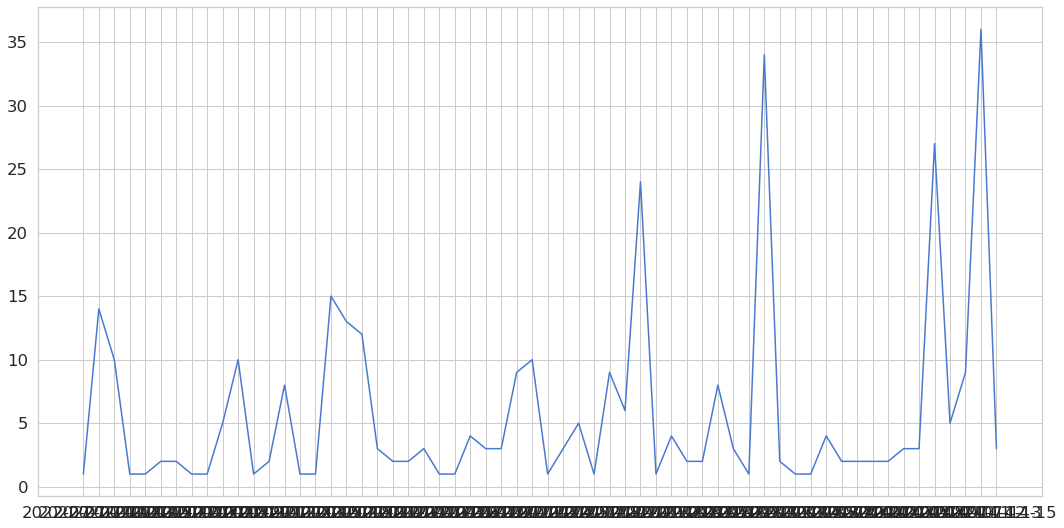

In [203]:
plot_anomalies(anomalyEncB6,column_y='close',test=anomalyEncB6.test[100:400], expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')

In [ ]:
plot_anomalies(anomalyEncC6,column_y='close',test=anomalyEncC6.test[100:400], expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')

#anomalyEnc.scaler.inverse_transform(anomalyEncC6.test)

In [ ]:
#plot_graph2(test=anomalyEncC6.test, column_y='close', expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')
plot_graph2(test=pda_hour, column_y='outcome', expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')

In [ ]:
_df = sparkSession.read.parquet('/tmp/' + sf.iloc[len(sf)-10].file)
_pfall = _df.toPandas()

In [ ]:
_pfall = _pfall[(_pfall['year']==2022) & ((_pfall['month']==7) | (_pfall['month']==6))].reset_index()

In [ ]:
_pda_hour = createData_ymdh(_pfall,0)
check(_pda_hour)
replace_index_by_date_column(_pda_hour)
_pda_hour = _pda_hour.sort_index()

In [ ]:
_pda_hour.loc['2022-07-14-15'], pda_hour.loc['2022-07-14-15']

In [ ]:
#_pda_hour[(_pda_hour['month']==7)  & (_pda_hour['day']==12)]
plot_graph2(test=_pda_hour, column_y='outcome', expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')
#_pda_hour.index.get_loc('2022-07-12-10')

In [ ]:
def createBarplot(md=None,fx=24,fy=12,fontscale=3.0,title="",expect=None) :
    sns.set(style='whitegrid', palette='muted', font_scale=fontscale)
    plt.figure(figsize=(fx,fy))
    plt.title(title)
    ax = sns.barplot(x=md.index, y=md['close'], data=md)
    #ax = sns.barplot(x=md['date'], y=md['outcome'], data=md)
    #plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
    _test=md
    #ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    #plt.xticks(range(0,len(ticks)), ticks, rotation=80)
    label(ax,20,80)
    
    #plt.xticks(range(0,len(_test.index)), _test.index)
    #plt.xticks(rotation=80,ticks=ticks)
    plt.tight_layout()
    
    if expect is not None:
        #print(_test.index.get_loc(expect[0]),_test.index.get_loc(expect[1]))
        e1=_test.index.get_loc(expect[0])
        e2=_test.index.get_loc(expect[1])
        x = np.arange(e1,e2)
        #x = np.arange(expect[0],expect[1])
        _max = np.max(anomalyEnc.scaler.inverse_transform( _test))
        y1 = [0]*len(x)
        y2 = [_max]*len(x)
        plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
    
    plt.show()
    return ax

In [ ]:
#anomalyEncC6.test[100:400].index
createBarplot(anomalyEncC6.test[100:400],24,12,3.0,expect=('2022-07-12-10','2022-07-13-15'))

In [ ]:
_numsenders = str(len(senders))
md = createData_ym(pfall0,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by endpoint "  + str(pd.unique(pfall0['CSENDERENDPOINTID'])[0]) + ' (' + _numsenders + ' sending endpoints)' )

In [ ]:
inverse_transform_anomalies(scaler=anomalyEncC6.scaler,anomalies=anomalyEncC6.anomalies)

In [ ]:
anomalyEncC6.test.loc['2022-07-12-06']

In [ ]:
pda_hour[(pda_hour['year'] == 2022) & (pda_hour['month'] == 7) & (pda_hour['day'] == 12)] 

In [ ]:
anomalyEncC6.test[:400]

In [ ]:
get_anomalies(anomalyEncC6,1.6)

In [ ]:
pd.unique(anomalyEnc2.anomalies['threshold'])[0]

In [ ]:
anomalyEnc.test

fig = plt.figure(figsize=(18,9))
_test = anomalyEnc2.test.iloc[2100:]
plt.plot(_test.index, _test['close'])    
ax = scatterplot(_anomalies.index, _anomalies['close'], 'anomaly') 

In [ ]:
_a = _anomalies['outcome']
_a = pd.DataFrame(_a)
_a = scaler.inverse_transform(_a)
_a = _a[:, 0]
_a

In [ ]:
_thresholdC1 = getThreshold(1.0,anomalyEncC1)
_thresholdC2 = getThreshold(1.0,anomalyEncC2)
_thresholdC3 = getThreshold(1.0,anomalyEncC3)
_thresholdC4 = getThreshold(1.0,anomalyEncC4)
_thresholdC5 = getThreshold(1.0,anomalyEncC5)
_thresholdC6 = getThreshold(1.0,anomalyEncC6)

In [ ]:
get_anomalies(anomalyEncC1,_thresholdC1 * 0.8)
get_anomalies(anomalyEncC2,_thresholdC2 * 0.8)
get_anomalies(anomalyEncC3,_thresholdC3 * 0.8)
get_anomalies(anomalyEncC4,_thresholdC4 * 0.8)
get_anomalies(anomalyEncC5,_thresholdC5 * 0.8)
get_anomalies(anomalyEncC6,_thresholdC6 * 0.8)

In [ ]:
_threshold7 = getThreshold(1.0,anomalyEnc7)

In [ ]:
get_anomalies(anomalyEnc7,_threshold7 * 0.6)

In [ ]:
get_anomalies(anomalyEnc3,_threshold3 * 0.8)

In [ ]:
anomalyEnc4.anomalies

In [ ]:
get_anomalies(anomalyEnc4,_threshold4 * 0.7)
filtered_plot_enc(anomalyEnc4,'2022-07-','titlestring','xlabel',100,80)

In [ ]:
filtered_plot_enc(anomalyEnc6,'2022-07-','titlestring','xlabel',100,80)

In [ ]:
_threshold3 = getThreshold(1.0,anomalyEnc3)

In [ ]:
get_anomalies(anomalyEnc3,_threshold3 * 0.9)

In [ ]:
filtered_plot(anomalyEnc3.test,anomalyEnc3.scaler,anomalyEnc3.anomalies,anomalyEnc3.TIME_STEPS,'2022-07-1','titlestring','xlabel',70,80) 

In [ ]:
def plot_test(anomalyEnc,anomalies,titlestring,xlabel):

    fig = plt.figure(figsize=(18,9))
    
    _a=anomalies['close']
    _a = pd.DataFrame(_a)
    _a = anomalyEnc.scaler.inverse_transform(_a)
    _a = _a[:, 0]
    #print(_a,type(_a),_a[0],len(_a),len(_a[:, 0]))
    ax = scatterplot(anomalies.index, _a, 'anomaly') 
    
    ax.set_xlabel(xlabel)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    plt.xticks(rotation=25)
    plt.legend();

    label(ax,5,80)
    plt.title(titlestring)
    plt.show(fig)


In [ ]:
anomalies = get_anomalies(anomalyEnc3,_threshold3 * 0.9)
plot_test(anomalyEnc3, anomalies, '','')

In [ ]:
anomalies.index

In [ ]:
filtered_plot(anomalyEnc3.test,anomalyEnc3.scaler,anomalyEnc3.anomalies,anomalyEnc3.TIME_STEPS,'2022-07-1','titlestring','xlabel') 

In [ ]:
def plot_test1(anomalies,test,scaler,titlestring,xlabel):

    fig = plt.figure(figsize=(18,9))
    
    plt.plot(
      #test[anomalyEnc.TIME_STEPS:].index, 
      test.index,  
      #scaler.inverse_transform(test[TIME_STEPS:].close), 
      #scaler.inverse_transform(test[anomalyEnc.TIME_STEPS:]),  
      scaler.inverse_transform(test),  
      label='msg count'
    );

    
    _a=anomalies['close']
    _a = pd.DataFrame(_a)
    _a = anomalyEnc.scaler.inverse_transform(_a)
    _a = _a[:, 0]
    #print(_a,type(_a),_a[0],len(_a),len(_a[:, 0]))
    ax = scatterplot(anomalies.index, _a, 'anomaly') 
    
    
    #ax.set_xlabel(xlabel)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    plt.xticks(rotation=25)
    plt.legend();

    #label(ax,5,80)
    plt.title(titlestring)
    plt.show(fig)


In [ ]:
_df = anomalyEnc3.test
_df = _df[_df.index.str.contains('2022-07-1')]
plot_test1(anomalies,_df,anomalyEnc3.scaler,'','')

In [ ]:
_df

In [ ]:

listi = list(anomalyEnc3.test.index)
sub = '2022-07-1'

print ("\n".join(s for s in listi if sub in s))

In [ ]:
anomalyEnc3.test

In [ ]:
get_anomalies(anomalyEnc1,_threshold1 * 0.9)

In [ ]:
listi = list(anomalyEnc2.anomalies.index)
sub = '2022-07-1'

print ("\n".join(s for s in listi if sub in s))

In [ ]:
#getThreshold(0.9),getThreshold(0.8),getThreshold(0.7),getThreshold(0.6),getThreshold(0.5)
_thresholds=(5.723571592241854,5.151214433017669,4.578857273793484,4.006500114569298,3.4341429553451124,2.861785796120927)
#getThreshold(1.0)

In [ ]:
_thresholds[0] - _thresholds[1], _thresholds[2] - _thresholds[3]

In [ ]:
percent.disabled=False

In [ ]:
xs=list(anomalyEnc.anomalies.index)
[s for s in xs if "2022" in s]

# Demo

In [ ]:
pfall0

In [ ]:
CSENDERENDPOINTID=0
CRECEIVERENDPOINTID=0
print(TimeRange(dataframe=pfall).__dict__)
md = createData_ym(pfall0,0)
ax=createBarplot(md,24,12,3.0,title="number messages " +  "endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID))

In [ ]:
display (year_hbox,month_hbox,out)

In [ ]:
percent   = widgets.Text(description = 'percent',value = '0.985', style=style, layout=layout,disabled=False)    
percent.on_submit(on_value_submit_percent)

models = widgets.Dropdown(description='model',options =[1,2], style=style, layout=layout,disabled=False)
models.observe(models_on_change) 

anomalyEnc = anomalyEnc1
display(models,percent,threshold,out3)

In [ ]:
len(anomalyEnc.anomalies)

In [ ]:
'2022-10-02-14' in anomalyEnc.anomalies.index

listi = list(anomalyEnc2.anomalies.index)
sub = '2022-07-1'

print ("\n".join(s for s in listi if sub in s))

# Demo 2

## Messagetracking der Service-Cloud

In [ ]:
pfall0

In [ ]:
_numsenders = str(len(senders))
md = createData_ym(pfall0,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by endpoint "  + str(pd.unique(pfall0['CSENDERENDPOINTID'])[0]) + ' (' + _numsenders + ' sending endpoints)' )

### Problembeschreibungen / Erwartungsmonitoring

- am 12.07.2022 wurde ein BIS Release installiert dass zur Verzögerung vieler Nachrichten geführt hat.
Die letzten Nachrichten wurden am Folgetag um ca. 15:00 Uhr CET verarbeitet.
Es sollten also deutliche Anomalien zwischen 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) zu sehen sein.


- 13.09.2022 19:00 Uhr / 20:00 Uhr UTC: Massive Last, Anflutung des Systems, vor allem im zweiten Intervall.
Durchlaufzeiten waren deutlich erhöht. 


### Anomalieerkennung und Erwartungsmonitoring (messages sent / hour)

In [ ]:
#anomalyEnc6 = train_model(dataframe=pda_hour, time_steps=24, year=2022,month=6)
filtered_plot_enc(anomalyEnc6,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24')

### Anomalieerkennung und Erwartungsmonitoring (Durchlaufszeit)

In [ ]:
filtered_plot_enc2(anomalyEnc5,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24', ylabel='CMESSAGETAT2')

In [ ]:
anomalyEnc5.test.index.get_loc( '2022-09-01-00')

In [ ]:
_num_anomalies = len(get_anomalies(anomalyEnc5,_threshold5 * 0.8))
filtered_plot_enc2(anomalyEnc5,date_from='2022-09-15-00', date_to='2022-10-04-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24' + ', #anomalies: ' + str(_num_anomalies), ylabel='CMESSAGETAT2',annotations=False)

In [ ]:
_num_anomalies = len(get_anomalies(anomalyEnc5,_threshold5 * 0.77))
filtered_plot_enc2(anomalyEnc5,date_from='2022-09-15-00', date_to='2022-10-04-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24' + ', #anomalies: ' + str(_num_anomalies), ylabel='CMESSAGETAT2',annotations=False)

In [ ]:
_num_anomalies = len(get_anomalies(anomalyEnc5,_threshold5 * 0.75))
filtered_plot_enc2(anomalyEnc5,date_from='2022-08-17-00', date_to='2022-10-04-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24' + ', #anomalies: ' + str(_num_anomalies), ylabel='CMESSAGETAT2',annotations=False)

In [ ]:
get_anomalies(anomalyEnc5,_threshold5 * 0.77)

# Trial Ecg

In [ ]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
#!git clone https://github.com/ReNom-dev-team/ReNom.git
!pip install renom

In [ ]:
!git clone https://github.com/ReNom-dev-team/ReNom.git
!pip install -r requirements.txt
!cd ReNom
!pip install -e .

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

import renom as rm
from renom.optimizer import Adam
from renom.cuda import set_cuda_active
set_cuda_active(False)

In [ ]:
#https://www.renom.jp/notebooks/tutorial/time_series/lstm-anomalydetection/notebook.html

# standardize
scaler = StandardScaler()
std_ecg = scaler.fit_transform(ecg)

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(np.arange(5000), std_ecg[:5000], color='b')
plt.ylim(-3, 3)
x = np.arange(4200,4400)
y1 = [-3]*len(x)
y2 = [3]*len(x)
plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
plt.show()

In [ ]:
normal_cycle = std_ecg[5000:]

plt.figure(figsize=(10,5))
plt.title("training data")
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(np.arange(5000,8000), normal_cycle[:3000], color='b')# stop plot at 8000 times for friendly visual
plt.show()

In [ ]:
# create data of the "look_back" length from time-series, "ts"
# and the next "pred_length" values as labels
def create_subseq(ts, look_back, pred_length):
    sub_seq, next_values = [], []
    for i in range(len(ts)-look_back-pred_length):  
        sub_seq.append(ts[i:i+look_back])
        next_values.append(ts[i+look_back:i+look_back+pred_length].T[0])
    return sub_seq, next_values

In [ ]:
look_back = 10
pred_length = 3

sub_seq, next_values = create_subseq(normal_cycle, look_back, pred_length)


X_train, X_test, y_train, y_test = train_test_split(
    sub_seq, next_values, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


train_size = X_train.shape[0]
test_size = X_test.shape[0]
print('train size:{}, test size:{}'.format(train_size, test_size))

In [ ]:
# model definition
model = rm.Sequential([
    rm.Lstm(35),
    rm.Relu(),
    rm.Lstm(35),
    rm.Relu(),
    rm.Dense(pred_length)
    ])

In [464]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [467]:
!python --version

Python 3.9.10


In [ ]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
!pip3 install --trusted-host pypi.org --trusted-host files.pythonhosted.org tensorflow==2.4.1
!pip3 install --trusted-host pypi.org --trusted-host files.pythonhosted.org numpy==1.18.5

In [463]:
!pip version tensorflow

ERROR: unknown command "version"


# Kats

In [ ]:
#%%capture
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
import ssl
import certifi
import ssl
import urllib
context = ssl.create_default_context(cafile=certifi.where())
result = urllib.request.urlopen('https://www.example.com', context=context)
ssl._create_default_https_context = ssl._create_unverified_context
# For Google Colab:
!pip3 install --trusted-host pypi.org --trusted-host files.pythonhosted.org kats
    
#!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/air_passengers.csv
#!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/multi_ts.csv

In [34]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [83]:

df_ts_day = pd.DataFrame()
_pda_day = pda_day[pda_day['outcome'] != 0]
df_ts_day['time']  = _pda_day['date']
df_ts_day['value'] = _pda_day['outcome']
df_ts_day = df_ts_day.sort_values(['time']).reset_index()
del (df_ts_day['index'])

_ts_day = TimeSeriesData(df_ts_day)

In [152]:
#pda_hour['date,'outcome']
#TimeSeriesData(pda_hour)

tsdf = pd.DataFrame()
_pda_hour = pda_hour[pda_hour['outcome'] != 0]
tsdf['time']  = _pda_hour['date']
tsdf['value'] = _pda_hour['outcome']

_ts_hour = TimeSeriesData(tsdf)

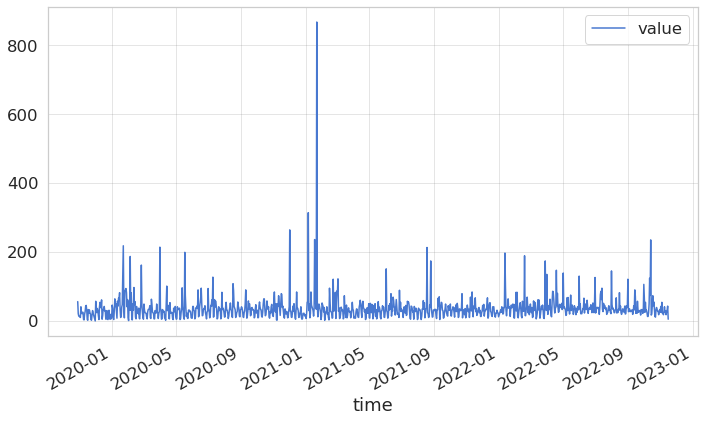

In [85]:
%matplotlib inline

# Must pass the name of the value columns to plot
#_ts.plot(cols=['value'])
_ts_day.plot(cols=['value'])
plt.show()

In [86]:
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative', daily_seasonality=True) # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(_ts, params)
m = ProphetModel(_ts_day, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

In [87]:
fcst.head()

,time,fcst,fcst_lower,fcst_upper
0,2022-12-01,44.253916,-0.858987,91.337954
1,2023-01-01,10.377609,-36.881067,56.838270
2,2023-02-01,75.527864,34.698024,118.477823
3,2023-03-01,66.520278,23.441342,112.070602
4,2023-04-01,17.270036,-27.716566,63.214856


<AxesSubplot:xlabel='time', ylabel='y'>

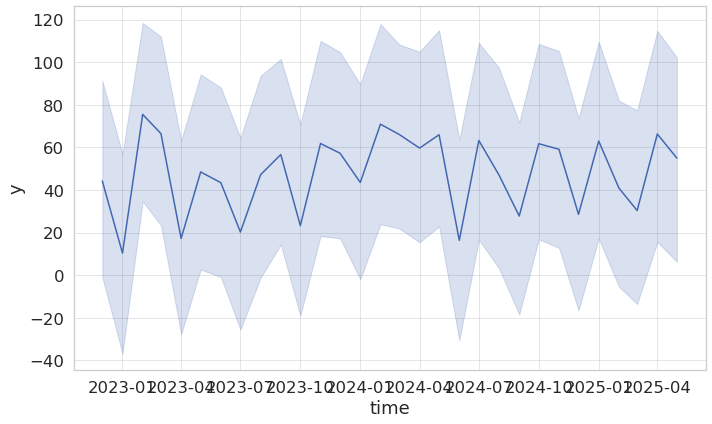

In [88]:
m.plot()

<AxesSubplot:xlabel='time', ylabel='y'>

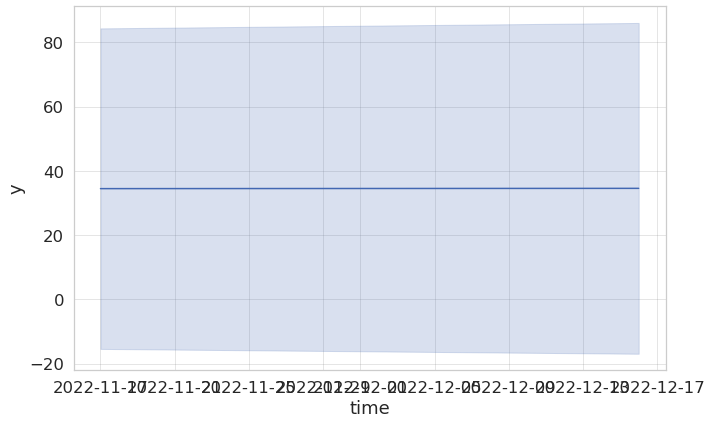

In [90]:
# import param and model from `kats.models.theta`
from kats.models.theta import ThetaModel, ThetaParams

# create ThetaParam with specifying seasonality param value
params = ThetaParams(m=12)

# create ThetaModel with given data and parameter class
m = ThetaModel(data=_ts_day, params=params)

# call fit method to fit model
m.fit()

# call predict method to predict the next 30 steps
res = m.predict(steps=30, alpha=0.2)

# visualize the results
m.plot()

In [91]:
# deep copy the air_passenger_df 
ts_outlier_day_df = df_ts_day.copy(deep=True)

ts_outlier_day_ts = TimeSeriesData(ts_outlier_day_df)

In [93]:
from kats.detectors.outlier import OutlierDetector

ts_outlierDetection = OutlierDetector(ts_outlier_day_ts, 'additive') # call OutlierDetector
ts_outlierDetection.detector() # apply OutlierDetector

In [95]:
#ts_outlierDetection.outliers[0]

day_ts_outliers_removed = ts_outlierDetection.remover(interpolate = False) # No interpolation
day_ts_outliers_interpolated = ts_outlierDetection.remover(interpolate = True) # With interpolation

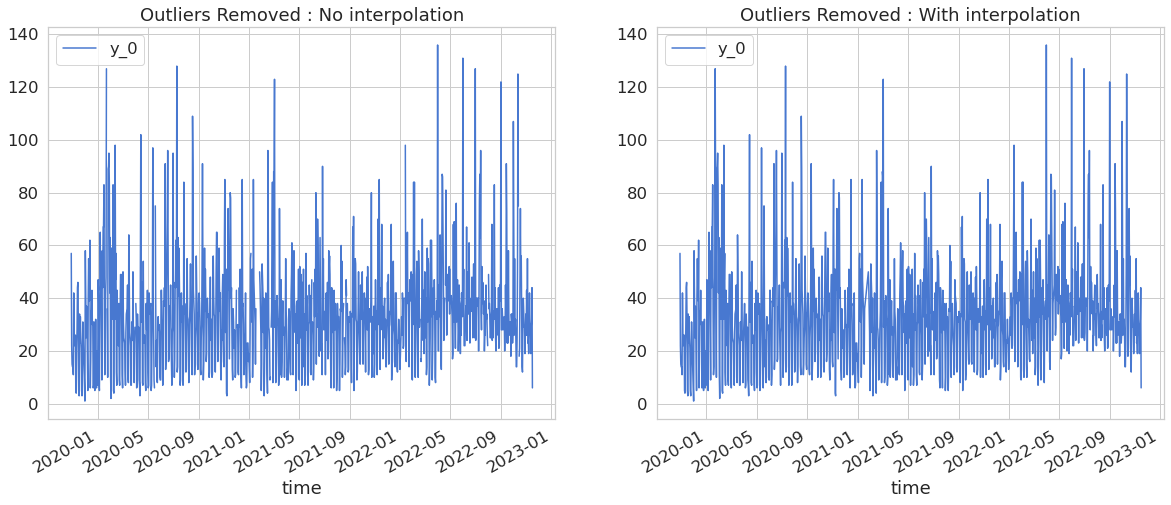

In [96]:
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

day_ts_outliers_removed.to_dataframe().plot(x = 'time',y = 'y_0', ax= ax[0])
ax[0].set_title("Outliers Removed : No interpolation")
day_ts_outliers_interpolated.to_dataframe().plot(x = 'time',y = 'y_0', ax= ax[1])
ax[1].set_title("Outliers Removed : With interpolation")
plt.show()

In [97]:
day_ts_outliers_removed.to_dataframe()

,time,y_0
0,2019-10-29,57.0
1,2019-10-30,22.0
2,2019-10-31,15.0
3,2019-11-01,14.0
4,2019-11-02,14.0
...,...,...
1105,2022-11-12,19.0
1106,2022-11-13,29.0
1107,2022-11-14,32.0
1108,2022-11-15,44.0


In [105]:
pda_day.loc['2020-01-23']
#pda_day

index              84
date       2020-01-23
year             2020
month               1
day                23
outcome           219
Name: 2020-01-23, dtype: object

In [99]:
ts_outlierDetection.outliers[0]

[Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-26 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-18 00:00:00'),
 Timestamp('2020-12-02 00:00:00'),
 Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-18 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2021-01-21 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-23 00:00:00'),
 Timestamp('2021-01-24 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2021-02-22 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-08-18 00:00:00'),
 Timestamp('2021-08-25 00:00:00'),
 Timestamp('2022-01-12 00:00:00'),
 Timestamp('2022-02-18 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-05-02 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-10-14 00:00:00')]

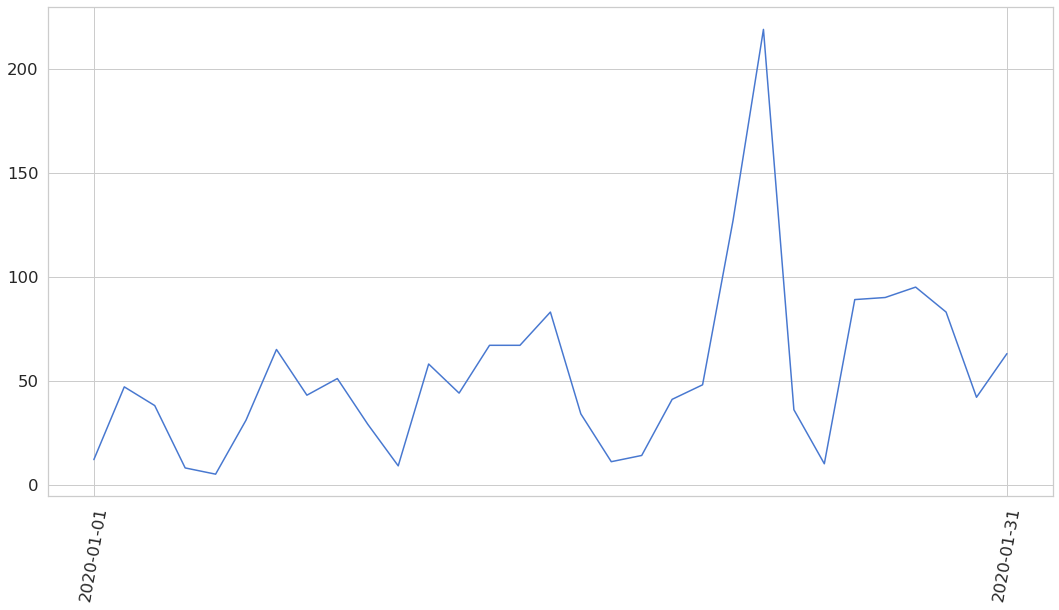

In [109]:
plot_graph2(test=pda_day, expect=None, column_y='outcome',contains='2020-01-', date_from=None, date_to=None)

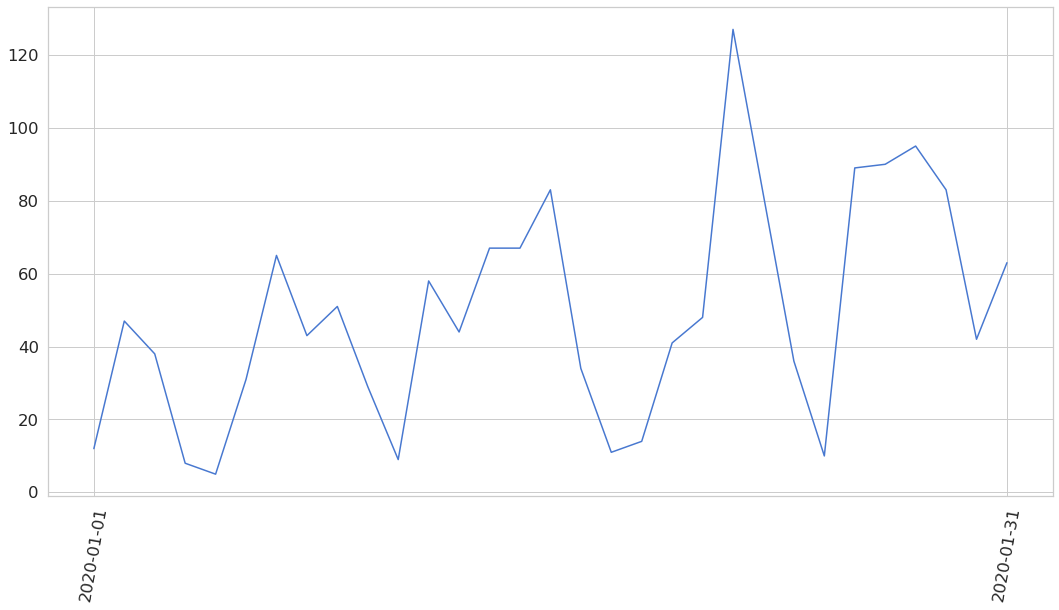

In [142]:
_df = replace_index_by_date_column(day_ts_outliers_interpolated.to_dataframe(),column='time')
_df.index =  get_ymd_string(_df.index.year.map(str),_df.index.month.map(str),_df.index.day.map(str))
plot_graph2(test=_df, expect=None, column_y='y_0',contains='2020-01-', date_from=None, date_to=None)



In [140]:

_df.columns

Index(['time', 'y_0'], dtype='object')

In [133]:

#_df.index.year.map(str)
#get_ymd_string(a,b,c)

In [149]:
_df = replace_index_by_date_column(day_ts_outliers_removed.to_dataframe(),column='time')
_df.index =  get_ymd_string(_df.index.year.map(str),_df.index.month.map(str),_df.index.day.map(str))

In [151]:
# Initiate feature extraction class
from kats.tsfeatures.tsfeatures import TsFeatures
tsFeatures = TsFeatures()

In [155]:
features_day = TsFeatures().transform(_ts_day)
features_hour = TsFeatures().transform(_ts_hour)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


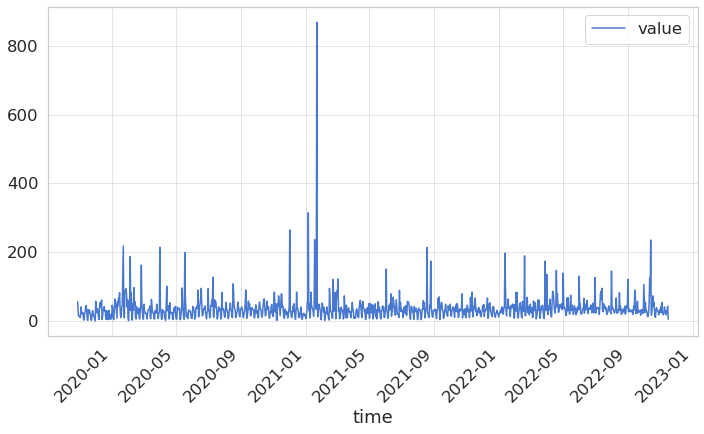

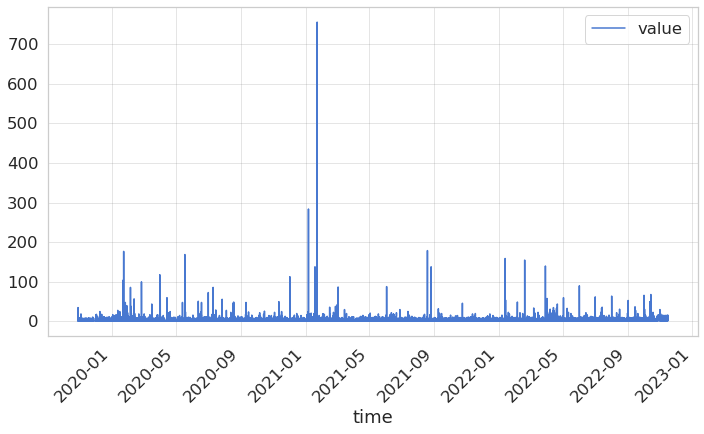

In [159]:
_ts_day.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()

_ts_hour.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()

In [158]:
_ts_hour

,time,value
0,2019-10-29 05:00:00,2
1,2019-10-29 08:00:00,8
2,2019-10-29 10:00:00,5
3,2019-10-29 15:00:00,1
4,2019-10-29 16:00:00,2
...,...,...
11924,2022-11-15 12:00:00,7
11925,2022-11-15 13:00:00,15
11926,2022-11-16 01:00:00,2
11927,2022-11-16 02:00:00,2


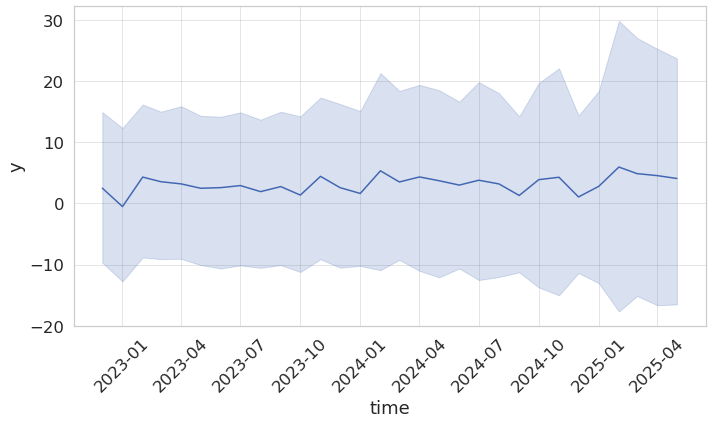

In [169]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(_ts_hour, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

# plot to visualize
m.plot()
plt.xticks(rotation = 45)
plt.show()

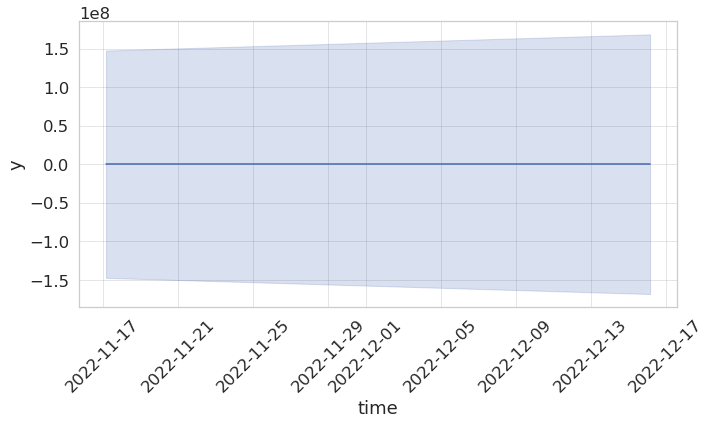

In [187]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=_ts_hour, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()
plt.xticks(rotation = 45)
plt.show()

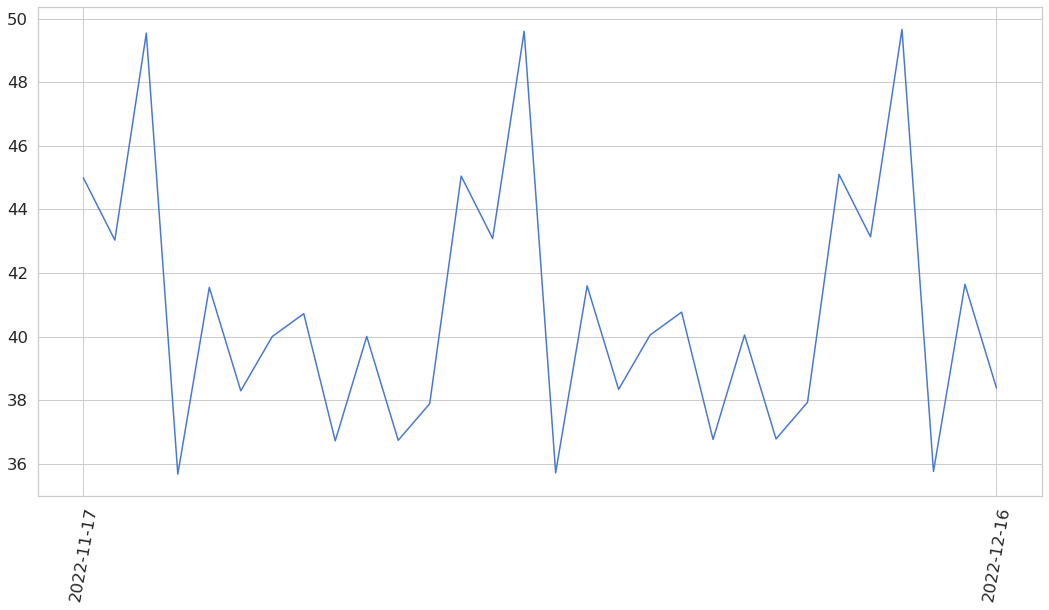

In [177]:
_df = fcst.copy()
replace_index_by_date_column(_df,column='time')
_df.index =  get_ymd_string(_df.index.year.map(str),_df.index.month.map(str),_df.index.day.map(str))
plot_graph2(test=_df, expect=None, column_y='fcst',contains=None, date_from=None, date_to=None)

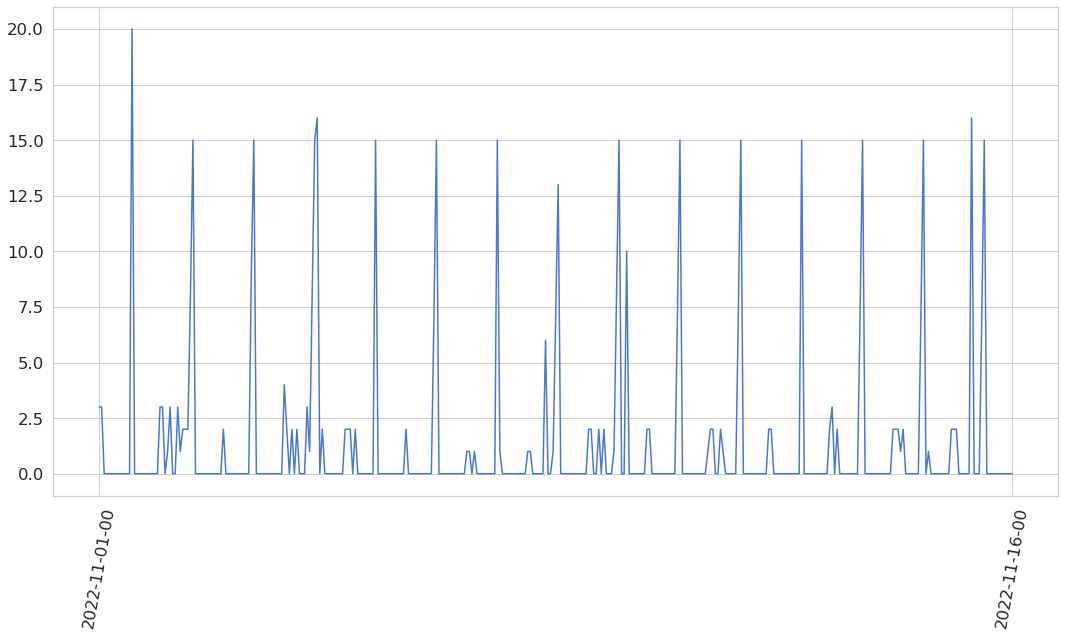

In [186]:
#plot_graph2(test=pda_day, expect=None, column_y='outcome',contains=None, date_from='2022-07-17', date_to='2022-11-16')
plot_graph2(test=pda_hour, expect=None, column_y='outcome',contains=None, date_from='2022-11-01-00', date_to='2022-11-16-00')